# Project 1: Random Graphs and Random Walks

| Name | ID |
|-----------|-----|
| Hsien-Chih Hung | 104466136 |
| Trung Le | 205223834 |
| Radhika Nayar | 805226085 |
| Juan Rebanal | 005227239 |


## Part1: Generating Random Networks

In [0]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



### Q1. Create random networks using Erdös-Rényi (ER) model

[1] "p = 0.003, mean = 3.076, variance = 3.12334734734735"
[1] "p = 0.004, mean = 3.938, variance = 3.83398998998999"
[1] "p = 0.01, mean = 10.038, variance = 9.50205805805806"
[1] "p = 0.05, mean = 50.23, variance = 49.0101101101101"
[1] "p = 0.1, mean = 100.022, variance = 95.476992992993"


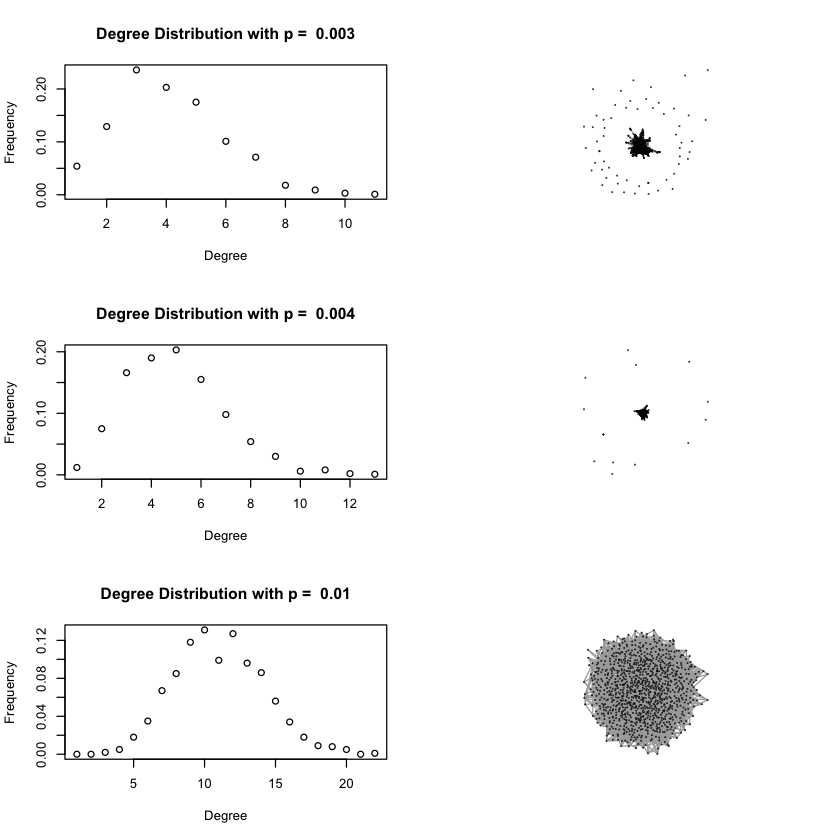

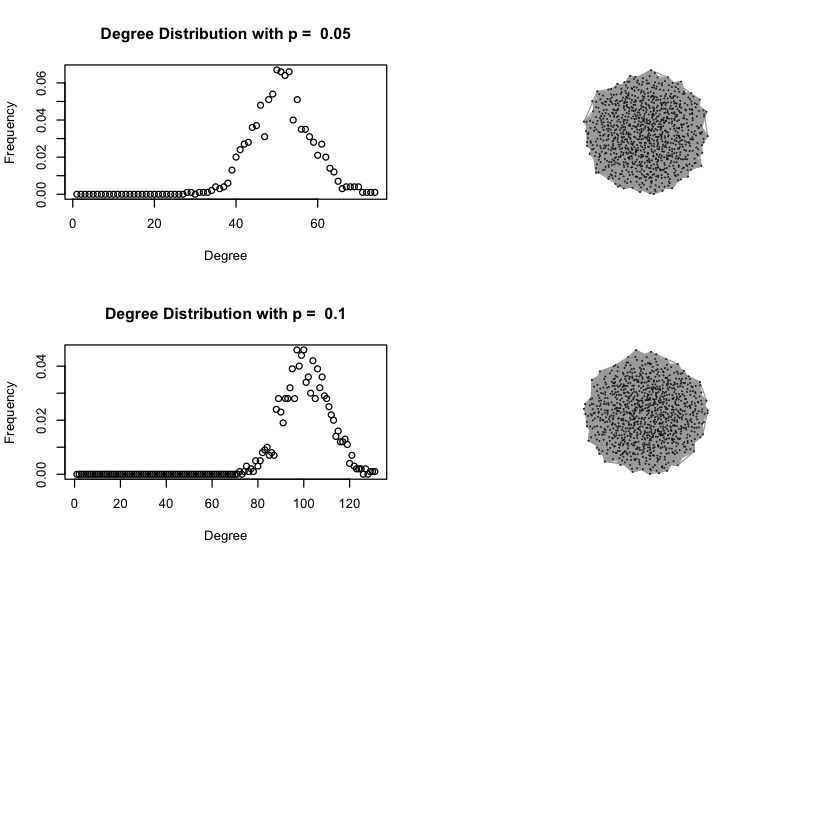

In [0]:
# part (a)

layout(matrix(c(1,2,3,4,5,6), 3, 2, byrow=TRUE))

prob <- c(0.003, 0.004, 0.01, 0.05, 0.1)

for(p in prob){
    g <- sample_gnp(1000, p, directed=FALSE, loops=FALSE)
    title = paste("Degree Distribution with p = ", p)
    plot(degree.distribution(g), main=title, xlab="Degree", ylab="Frequency")
    plot(g, vertex.size=1, vertex.label=NA)
    print(paste0("p = ", p, ", mean = ", mean(degree(g)), ", variance = ", var(degree(g))))
}

[1] "p = 0.003 , Connected probability = 0 , Diameter = 13"
[1] "p = 0.004 , Connected probability = 0 , Diameter = 10"
[1] "p = 0.01 , Connected probability = 0.969 , Diameter = 6"
[1] "p = 0.05 , Connected probability = 1 , Diameter = 3"
[1] "p = 0.1 , Connected probability = 1 , Diameter = 3"


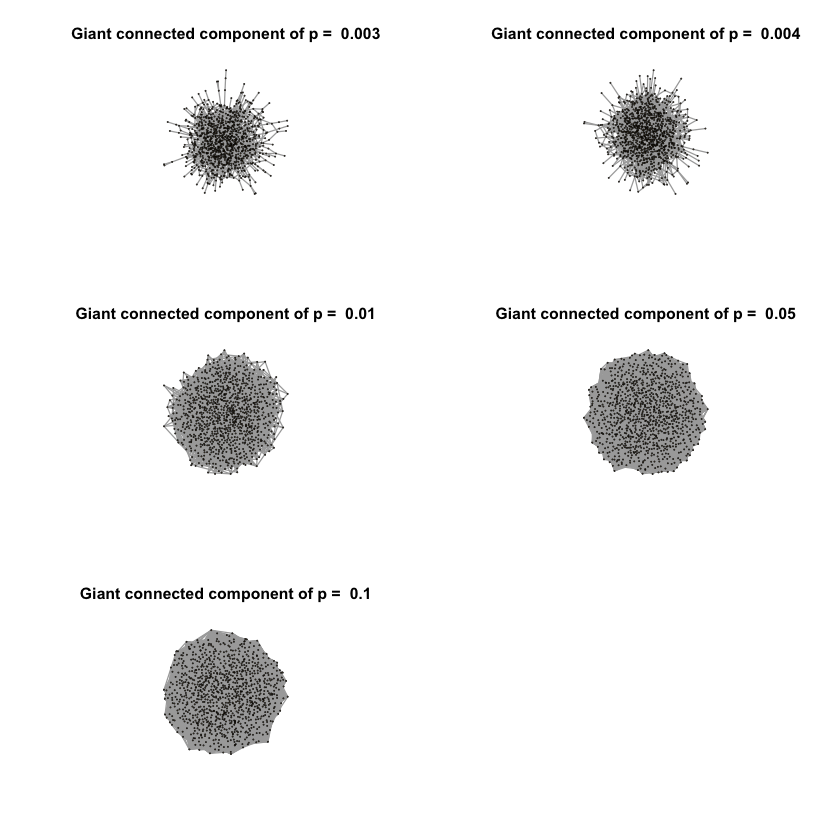

In [0]:
# part (b)

layout(matrix(c(1,2,3,4,5,6), 3, 2, byrow=TRUE))

prob <- c(0.003, 0.004, 0.01, 0.05, 0.1)

for (p in prob) {
    n <- 1000
    count <- 0
    for (iter in 1:n){
        if (is.connected(sample_gnp(1000, p, directed=FALSE, loops=FALSE))){
            count <- count + 1
        }
    }
    
    g = sample_gnp(1000, p, directed=FALSE, loops=FALSE)
    g.components <- clusters(g)
    i <- which.max(g.components$csize)
    gcc <- induced.subgraph(g, which(g.components$membership == i))
    title = paste("Giant connected component of p = ", p)
    plot(gcc, main=title, vertex.size=1, vertex.label=NA)
    
    d <- diameter(gcc, directed=FALSE, unconnected=FALSE)
    
    print(paste("p =", p, ", Connected probability =", count/n, ", Diameter =", d))
}

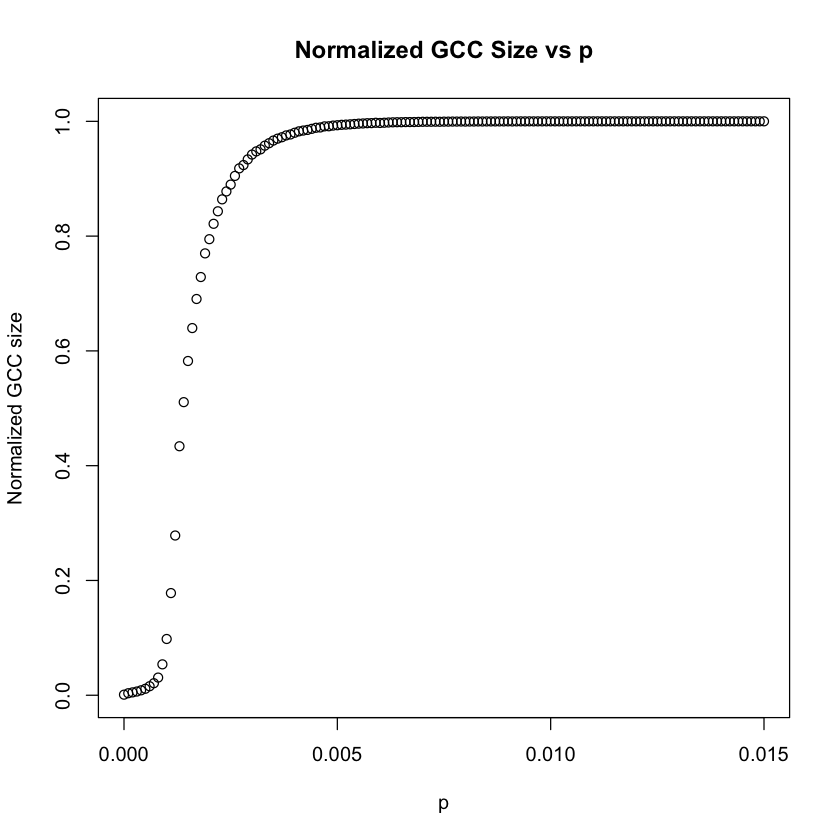

In [0]:
# part (c)

prob <- seq(0, 0.015, 0.0001)

size_avg <- c()

for (p in prob) {
    size <- 0
    for (iter in 1:100){
        g = sample_gnp(1000, p, directed=FALSE, loops=FALSE)
        g.components <- clusters(g)
        i <- which.max(g.components$csize)
        gcc <- induced.subgraph(g, which(g.components$membership == i))
        size <- size + length(V(gcc))/1000
    }
    size_avg <- c(size_avg, size/100)
}

plot(prob, size_avg, 
     main='Normalized GCC Size vs p', 
     xlab = 'p', 
     ylab = 'Normalized GCC size')

In [0]:
# part (d)

ExpectedSize <- function(n, p){
    size <- 0
    for (i in 1:100){
        g = sample_gnp(n, p, directed=FALSE, loops=FALSE)
        g.components <- clusters(g)
        i <- which.max(g.components$csize)
        gcc <- induced.subgraph(g, which(g.components$membership == i))
        size <- size + length(V(gcc))
    }
    size/100
}

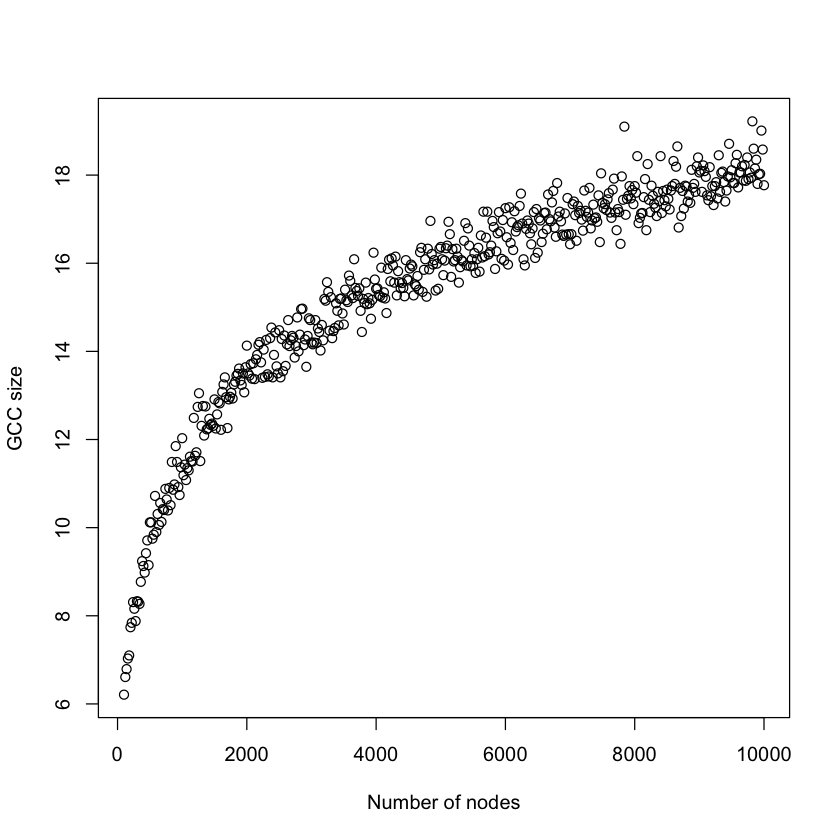

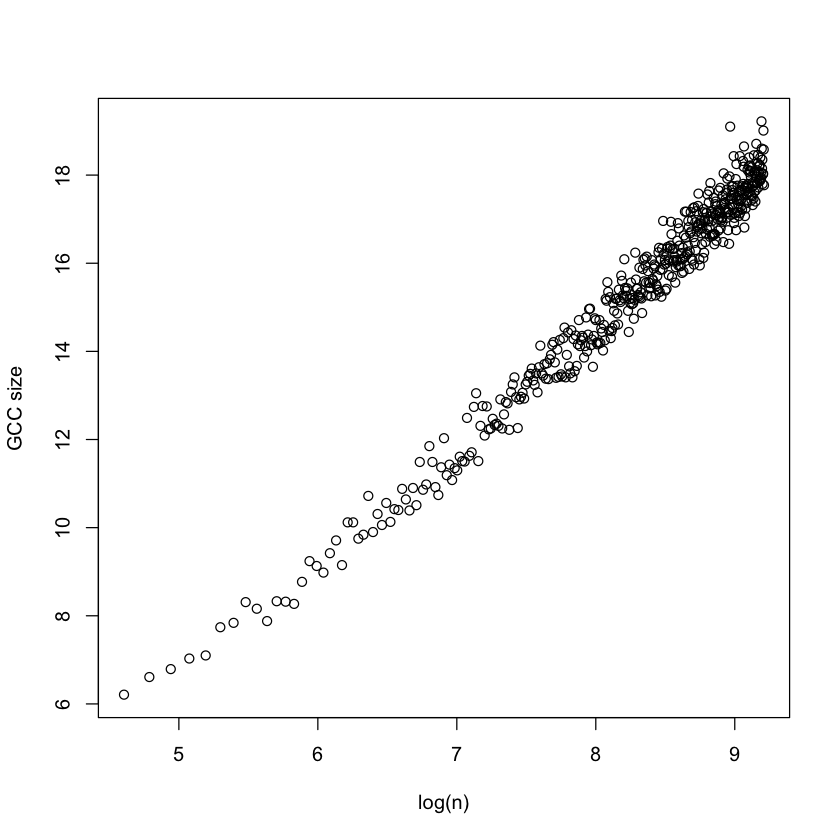

In [0]:
# i

c <- 0.5
n <- seq(100, 10000, 20)
p <- c/n

GccSize <- c()
for (i in 1:length(n)){
  GccSize = c(GccSize, ExpectedSize(n[i], p[i]))
}

plot(n, GccSize, 
     xlab = 'Number of nodes', 
     ylab = 'GCC size')

plot(log(n), GccSize, 
     xlab = 'log(n)', 
     ylab = 'GCC size')

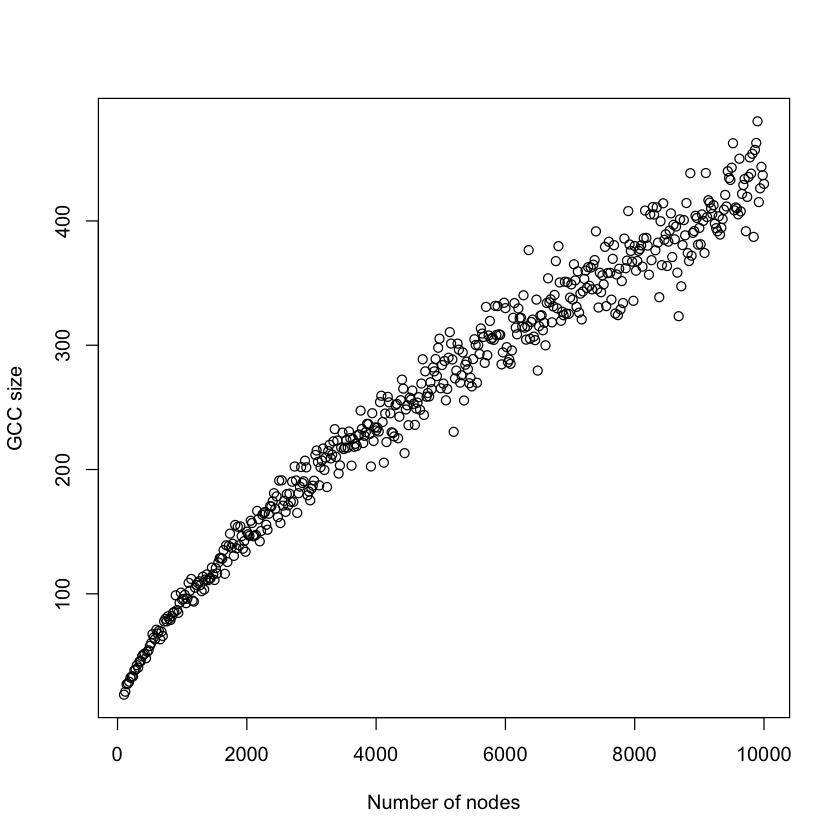

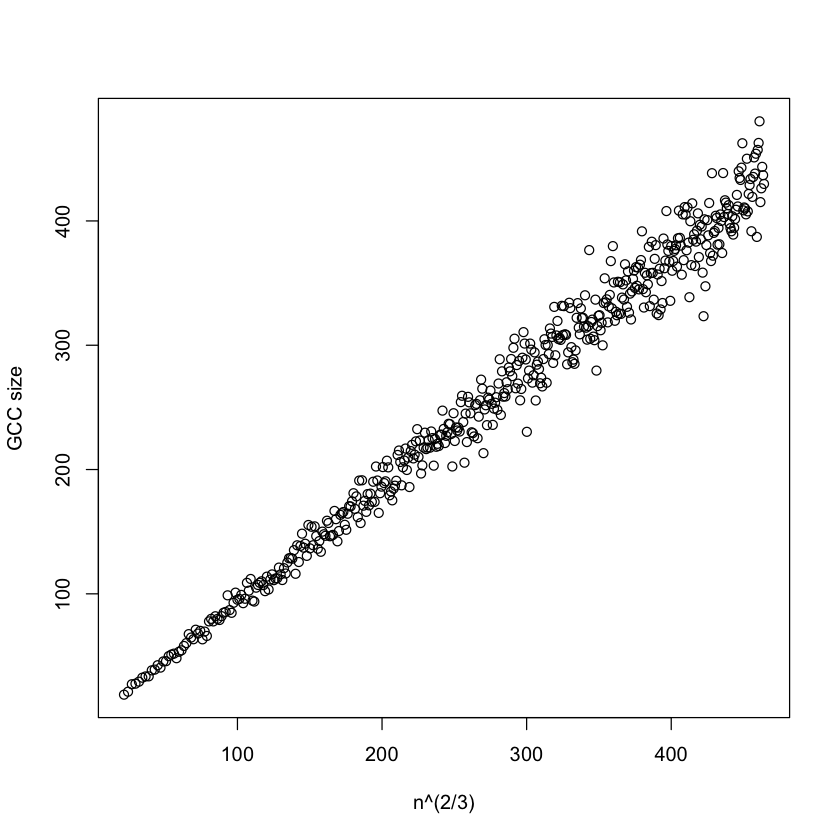

In [0]:
# ii

c <- 1
n <- seq(100, 10000, 20)
p <- c/n

GccSize <- c()
for (i in 1:length(n)){
  GccSize = c(GccSize, ExpectedSize(n[i], p[i]))
}

plot(n, GccSize, 
     xlab = 'Number of nodes', 
     ylab = 'GCC size')

plot(n^(2/3), GccSize, 
     xlab = 'n^(2/3)', 
     ylab = 'GCC size')

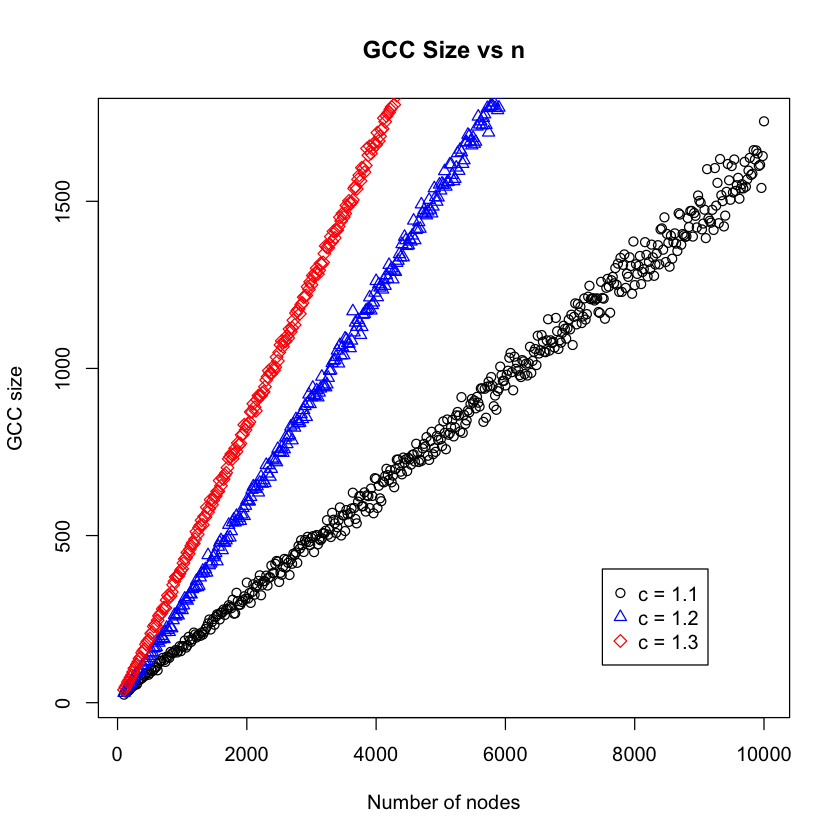

In [0]:
# iii
n <- seq(100, 10000, 20)
p1 <- 1.1/n
p2 <- 1.2/n
p3 <- 1.3/n

GccSize1 <- c()
GccSize2 <- c()
GccSize3 <- c()
for (i in 1:length(n)){
    GccSize1 = c(GccSize1, ExpectedSize(n[i], p1[i]))
    GccSize2 = c(GccSize2, ExpectedSize(n[i], p2[i]))
    GccSize3 = c(GccSize3, ExpectedSize(n[i], p3[i]))
}

plot(n, GccSize1, pch=1,
     xlab = 'Number of nodes', 
     ylab = 'GCC size')
points(n, GccSize2, col="blue", pch=2)
points(n, GccSize3, col="red", pch=5)

legend(x=7500, y=400, 
       legend=c("c = 1.1","c = 1.2","c = 1.3"), 
       col=c("black","blue","red"),
       pch=c(1,2,5))


### Q2. Create networks using preferential attachment model

Warning message:
"package 'igraph' was built under R version 3.5.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



[1] 1000
[1] 999
[1] TRUE


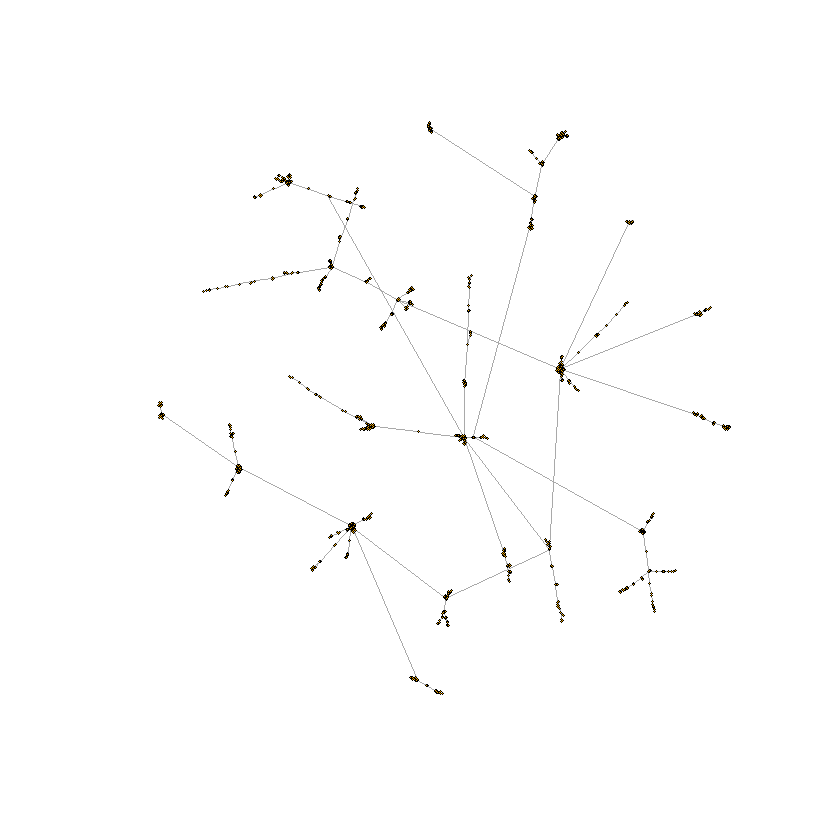

In [0]:
# (a)
library(igraph)
g <- sample_pa(n = 1000, m = 1, directed = FALSE)
plot(g, vertex.size = 1, vertex.label = NA)

# If, aside from the first vertex, each new vertex attaches to m = 1 old nodes, the graph must be connected.
# Alternatively, a tree is a connected graph that has m vertices and m-1 edges
print(vcount(g))
print(ecount(g))
print(is.connected(g))

[1] 0.9297891


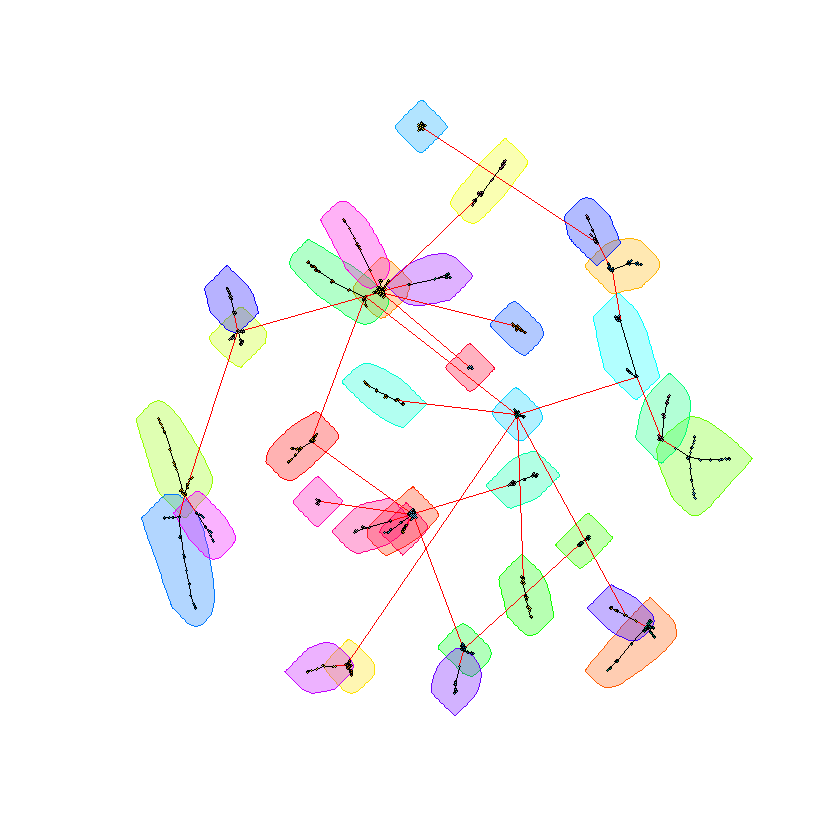

In [0]:
# (b)
h <- cluster_fast_greedy(graph = g) # Returns 'communities' object
plot(h, g, vertex.size = 1, vertex.label = NA)
print(modularity(h))

[1] 0.9783155


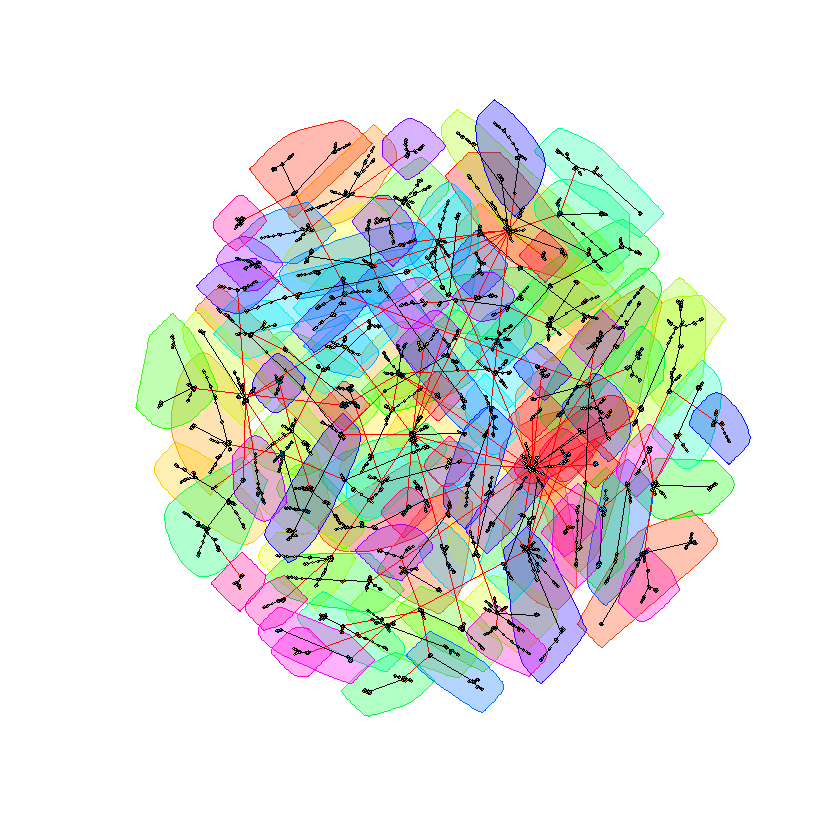

In [0]:
# (c)
g2 <- sample_pa(n = 10000, m = 1, directed = FALSE)

h2 <- cluster_fast_greedy(graph = g2) # Returns 'communities' object
plot(h2, g2, vertex.size = 1, vertex.label = NA)
print(modularity(h2))

# Modularity increases for n = 10000 compared to n = 1000

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"19 y values <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"26 y values <= 0 omitted from logarithmic plot"

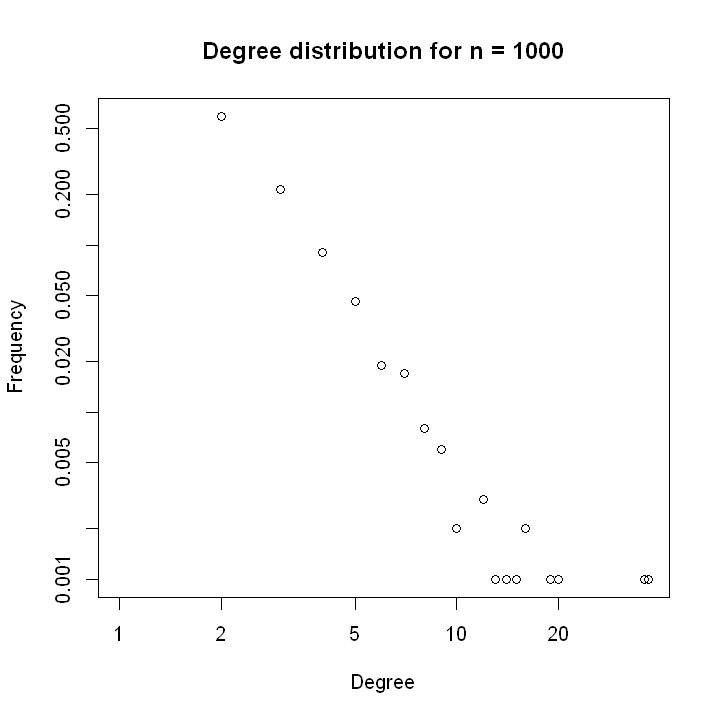

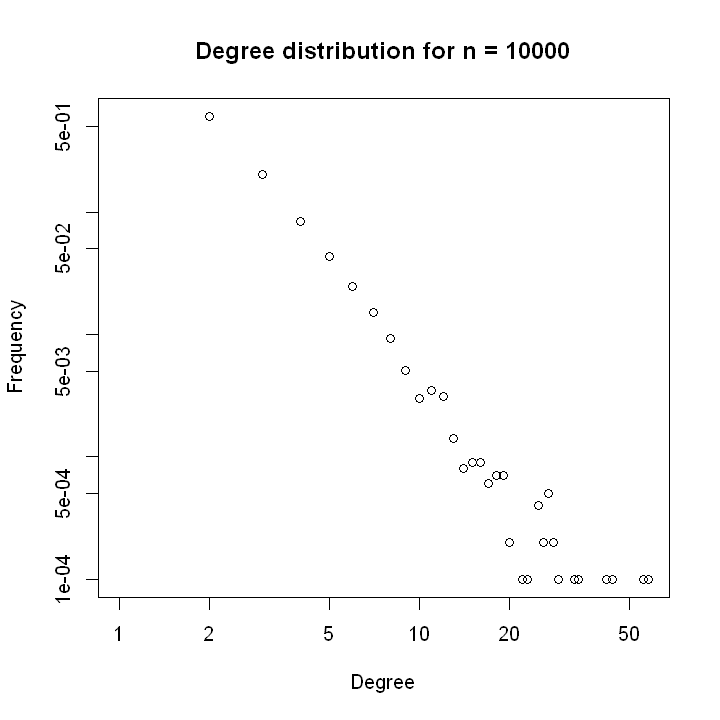

In [0]:
# (d)
set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

set_plot_dimensions(6, 6)

plot(degree_distribution(g),main="Degree distribution for n = 1000", xlab="Degree", ylab="Frequency", log="xy")
plot(degree_distribution(g2),main="Degree distribution for n = 10000", xlab="Degree", ylab="Frequency", log="xy")



Call:
lm(formula = y_log ~ degrees)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.14197 -0.25043 -0.08869  0.44240  1.41750 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.5106     0.5676    0.90    0.382    
degrees      -2.4470     0.2340  -10.46 1.47e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7638 on 16 degrees of freedom
  (19 observations deleted due to missingness)
Multiple R-squared:  0.8724,	Adjusted R-squared:  0.8644 
F-statistic: 109.4 on 1 and 16 DF,  p-value: 1.468e-08



Warning message in xy.coords(x, y, xlabel, ylabel, log):
"19 y values <= 0 omitted from logarithmic plot"

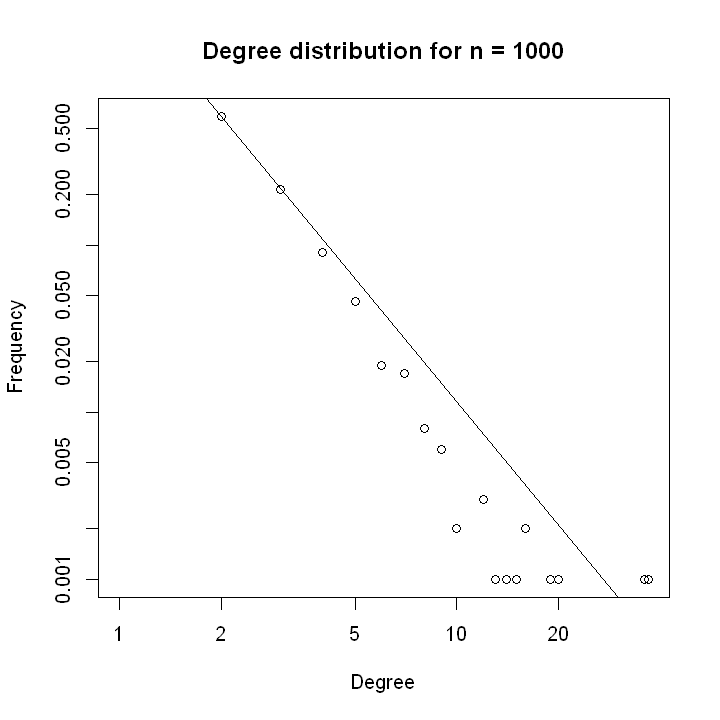

In [0]:
y_log = c(log(degree_distribution(g)))
y_log[!is.finite(y_log)] <- NA
degrees <- log(1:length(degree_distribution(g)))

# Intercept 
# y = cx^d -> logy = logc + dlogx -> [linreg] = ? + d[degrees]

linreg = lm(y_log ~ degrees)
print(summary(linreg))
plot(degree_distribution(g),main="Degree distribution for n = 1000", xlab="Degree", ylab="Frequency", log="xy")
abline(linreg)

# Slope is -2.3008

In [0]:
y_log2 = c(log(degree_distribution(g2)))
#print(which(y_log2==-Inf))
rmv_idx = which(y_log2 == -Inf)

#print(y_log2)
#print(y_log2[-rmv_idx])

#y_log2 <- y_log2[-rmv_idx]
y_log2[!is.finite(y_log2)] <- NA

degrees2 <- log(1:length(degree_distribution(g2)))
#degrees2 <- degrees2[-rmv_idx]

linreg2 = lm(y_log2 ~ degrees2)
print(summary(linreg2))
#plot(degree_distribution(g2),main="Degree distribution for n = 10000", xlab="Degree", ylab="Frequency", log="xy")
#abline(linreg2)

# Whether you remove the 0-frequency entries from the linear regression or set them to NA, result is the same

# Slope is -2.8484


Call:
lm(formula = y_log2 ~ degrees2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4349 -0.3084  0.0209  0.3541  1.3600 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.1367     0.3886   2.925   0.0065 ** 
degrees2     -2.8832     0.1359 -21.208   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6276 on 30 degrees of freedom
  (26 observations deleted due to missingness)
Multiple R-squared:  0.9375,	Adjusted R-squared:  0.9354 
F-statistic: 449.8 on 1 and 30 DF,  p-value: < 2.2e-16



In [0]:
# (e)

num_v = vcount(g)
num_e = ecount(g)

e_degree_dist <- list()
j_vertices <- list()

#for (idx in 1:length(degree_distribution(g))) {
for (idx in 1:1000) {
    sampled_v_idx = sample(1:num_v, 1)

    es = E(g)[sampled_v_idx %--% 1:num_v]
    adj_v = ends(g, es) # vertices j connected to node i (sampled_v_idx) by an edge
    adj_v2 = adj_v[which(adj_v != sampled_v_idx)] # vertices j


    #print(sampled_v_idx)
    #print(es)
    #print(adj_v)
    #print(adj_v2)

    j = sample(adj_v2, 1) 

    #print(j)

    j_edges = E(g)[j %--% 1:num_v]
    #print(j_edges)

    #this_deg = length(j_edges)
    #append(e_degree_dist, length(j_edges))
    e_degree_dist[[idx]] <- length(j_edges)
    j_vertices[[idx]] <- j
}

In [0]:
e_degree_dist = unlist(e_degree_dist, use.names=FALSE) # convert from list to vector

df = as.data.frame(table(e_degree_dist))
#print(df)
#plot(df$Freq)


Call:
lm(formula = y_log_subg ~ degrees_subg)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8885 -0.2811  0.2144  0.3786  1.4254 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.0106     0.5314  11.311 4.82e-09 ***
degrees_subg  -1.3799     0.2452  -5.627 3.78e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8108 on 16 degrees of freedom
Multiple R-squared:  0.6643,	Adjusted R-squared:  0.6433 
F-statistic: 31.66 on 1 and 16 DF,  p-value: 3.783e-05



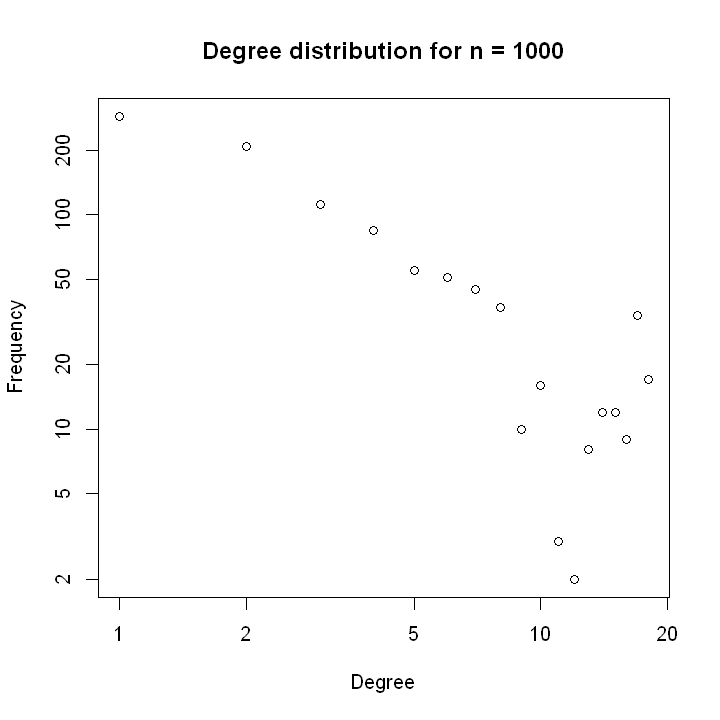

In [0]:
deg_dist = df$Freq
y_log_subg = c(log(deg_dist))
#length(y_log_subg)
y_log_subg[!is.finite(y_log_subg)] <- NA

degrees_subg <- log(1:length(deg_dist))
#degrees_subg <- log(1:1000)

linreg_subg = lm(y_log_subg ~ degrees_subg)
print(summary(linreg_subg))
plot(deg_dist,main="Degree distribution for n = 1000", xlab="Degree", ylab="Frequency", log="xy")
#abline(linreg_subg)

#plot(degree_distribution(subg),main="Degree distribution for n = 1000", xlab="Degree", ylab="Frequency", log="xy")



Call:
lm(formula = y_log_subg ~ degrees_subg)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7213 -0.1502  0.1552  0.2172  0.9311 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.8514     0.3886  15.059 1.84e-10 ***
degrees_subg  -1.1819     0.1836  -6.438 1.12e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5843 on 15 degrees of freedom
Multiple R-squared:  0.7343,	Adjusted R-squared:  0.7166 
F-statistic: 41.45 on 1 and 15 DF,  p-value: 1.117e-05



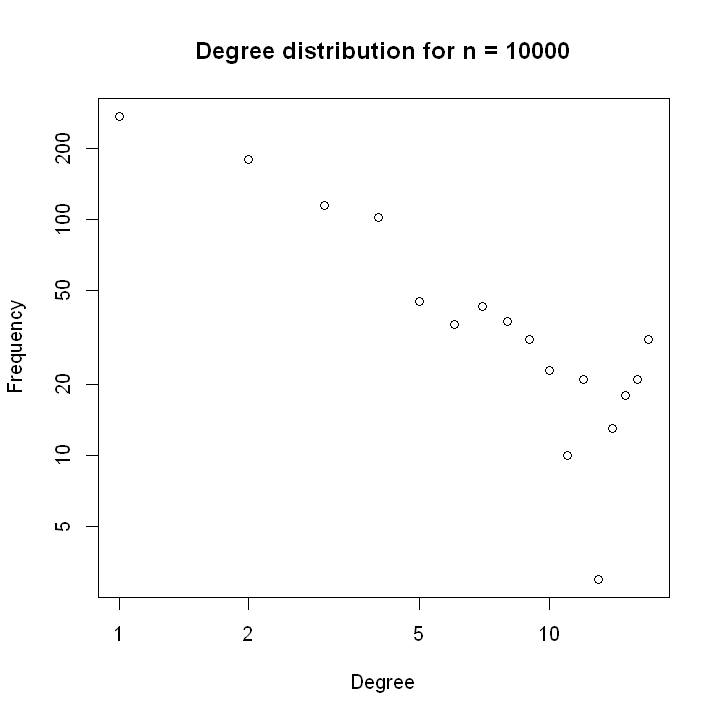

In [0]:
e_degree_dist <- list()
j_vertices <- list()

#for (idx in 1:length(degree_distribution(g))) {
for (idx in 1:1000) {
    sampled_v_idx = sample(1:num_v, 1)

    es = E(g2)[sampled_v_idx %--% 1:num_v]
    adj_v = ends(g2, es) # vertices j connected to node i (sampled_v_idx) by an edge
    adj_v2 = adj_v[which(adj_v != sampled_v_idx)] # vertices j


    #print(sampled_v_idx)
    #print(es)
    #print(adj_v)
    #print(adj_v2)

    j = sample(adj_v2, 1) 

    #print(j)

    j_edges = E(g2)[j %--% 1:num_v]
    #print(j_edges)

    #this_deg = length(j_edges)
    #append(e_degree_dist, length(j_edges))
    e_degree_dist[[idx]] <- length(j_edges)
    j_vertices[[idx]] <- j
}

e_degree_dist = unlist(e_degree_dist, use.names=FALSE) # convert from list to vector

df = as.data.frame(table(e_degree_dist))

deg_dist = df$Freq
y_log_subg = c(log(deg_dist))
#length(y_log_subg)
y_log_subg[!is.finite(y_log_subg)] <- NA

degrees_subg <- log(1:length(deg_dist))
#degrees_subg <- log(1:1000)

linreg_subg = lm(y_log_subg ~ degrees_subg)
print(summary(linreg_subg))
plot(deg_dist,main="Degree distribution for n = 10000", xlab="Degree", ylab="Frequency", log="xy")
#abline(linreg_subg)

# For both graphs, degree distributions are again linear in log-log scale, with about half their respective slopes

In [0]:
# (f)

# create n graphs 
n = 100
num_vtx = 1000
degrees <- matrix(0, nrow = n, ncol = num_vtx) # num graphs x num vertices in each graph 

for (i in 1:n) {
    g_i <- sample_pa(n = num_vtx, m = 1, directed = FALSE)
    #print(g_i)
    for (j in 1:num_vtx) {
        es = E(g_i)[j %--% 1:num_vtx]
        degrees[i, j] <- length(es) # put number of edges = degree into element
    }

}


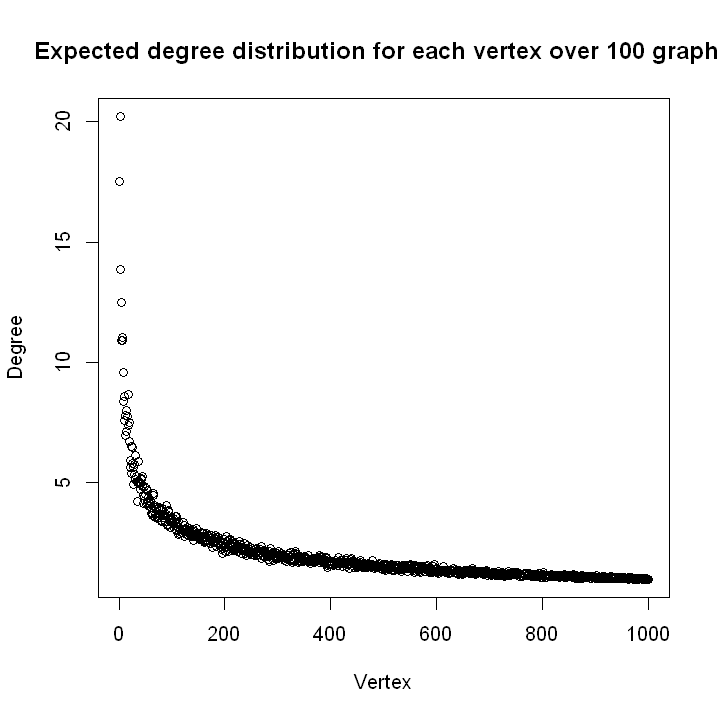

In [0]:
# take average along each column to get average degree for each vertex number (col numbers are vertex numbers 1:num_vtx)
y = colMeans(degrees)
plot(y, main="Expected degree distribution for each vertex over 100 graphs", xlab="Vertex", ylab="Degree")

### Part (g): Repeating previous parts

[1] 1000
[1] 1997
[1] TRUE


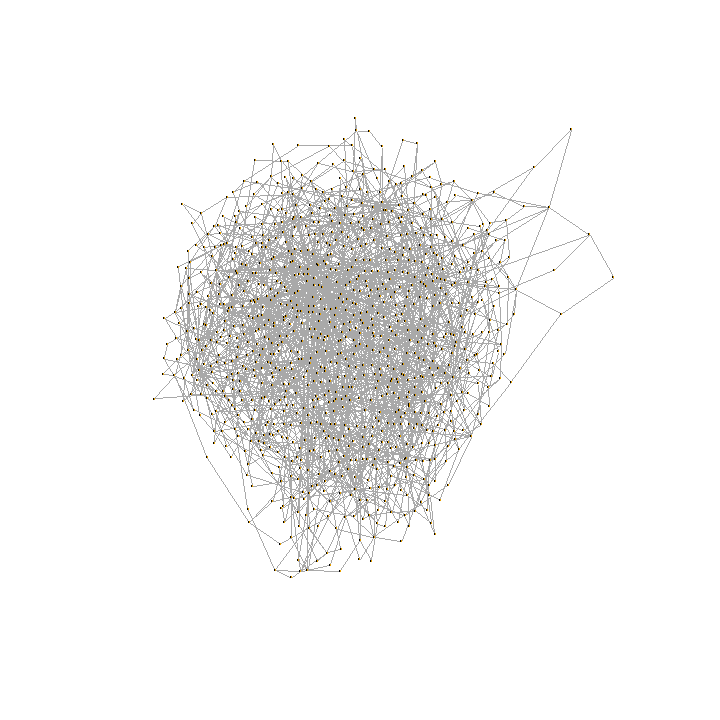

In [0]:
# m = 2
g <- sample_pa(n = 1000, m = 2, directed = FALSE)
plot(g, vertex.size = 1, vertex.label = NA)

# If, aside from the first vertex, each new vertex attaches to m = 1 old nodes, the graph must be connected.
# Alternatively, a tree is a connected graph that has m vertices and m-1 edges
print(vcount(g))
print(ecount(g))
print(is.connected(g))

[1] 0.5238456


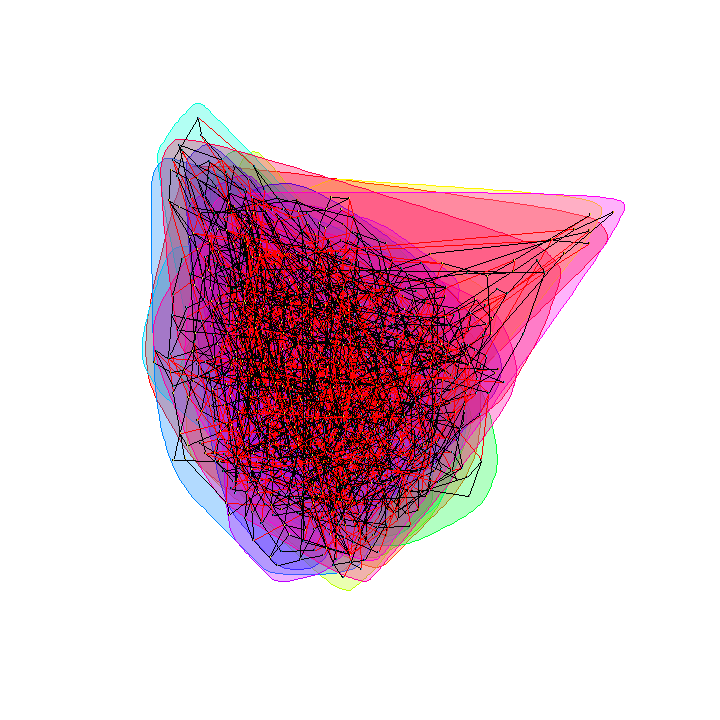

In [0]:
h <- cluster_fast_greedy(graph = g) # Returns 'communities' object
plot(h, g, vertex.size = 1, vertex.label = NA)
print(modularity(h))

[1] 0.5312704


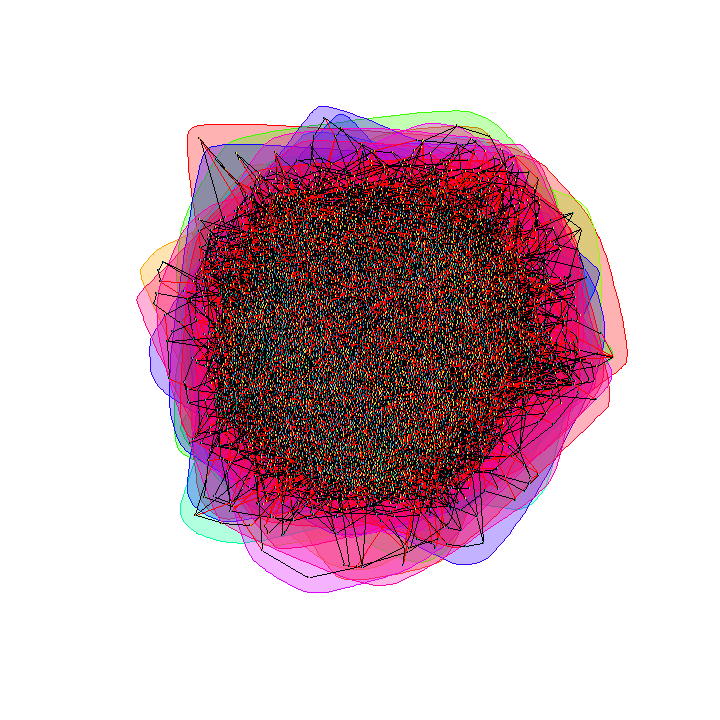

In [0]:
g2 <- sample_pa(n = 10000, m = 2, directed = FALSE)

h2 <- cluster_fast_greedy(graph = g2) # Returns 'communities' object
plot(h2, g2, vertex.size = 1, vertex.label = NA)
print(modularity(h2))

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"34 y values <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"112 y values <= 0 omitted from logarithmic plot"

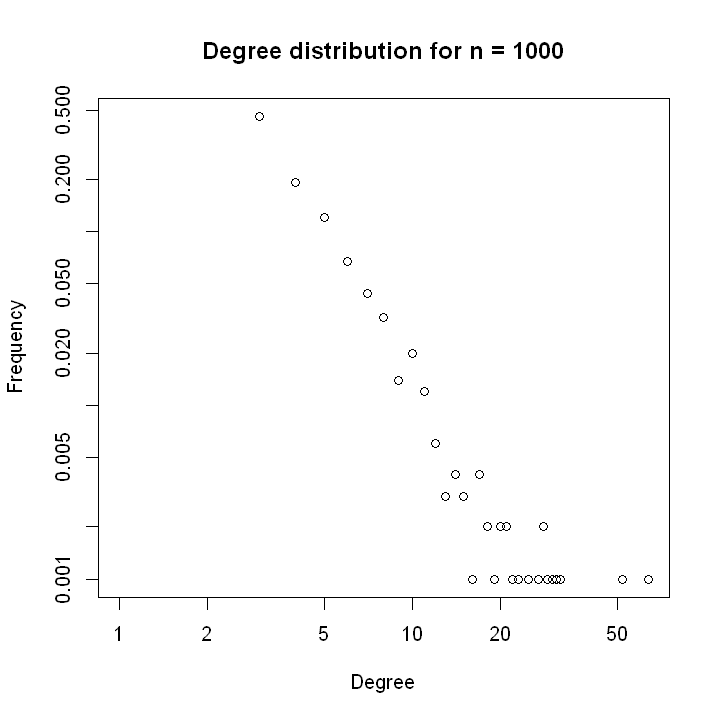


Call:
lm(formula = y_log ~ degrees)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.45939 -0.40355 -0.01968  0.41728  1.80365 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.0777     0.4989    2.16   0.0395 *  
degrees      -2.3538     0.1755  -13.41 1.04e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6843 on 28 degrees of freedom
  (34 observations deleted due to missingness)
Multiple R-squared:  0.8653,	Adjusted R-squared:  0.8604 
F-statistic: 179.8 on 1 and 28 DF,  p-value: 1.04e-13


Call:
lm(formula = y_log2 ~ degrees2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.50810 -0.39814  0.04254  0.48511  2.52462 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.1991     0.3814   3.144  0.00271 ** 
degrees2     -2.5242     0.1119 -22.567  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standa

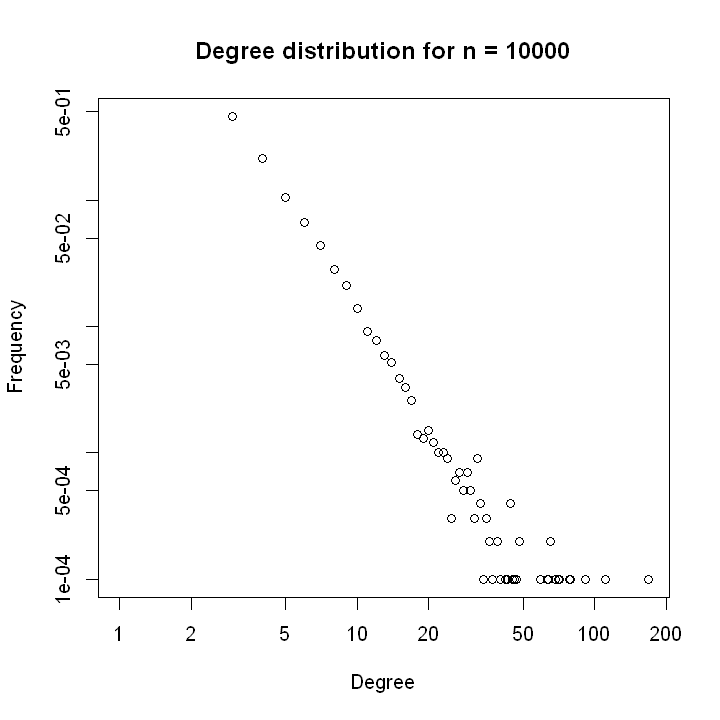

In [0]:
plot(degree_distribution(g),main="Degree distribution for n = 1000", xlab="Degree", ylab="Frequency", log="xy")
plot(degree_distribution(g2),main="Degree distribution for n = 10000", xlab="Degree", ylab="Frequency", log="xy")

y_log = c(log(degree_distribution(g)))
y_log[!is.finite(y_log)] <- NA
degrees <- log(1:length(degree_distribution(g)))

linreg = lm(y_log ~ degrees)
print(summary(linreg))
#plot(degree_distribution(g),main="Degree distribution for n = 1000", xlab="Degree", ylab="Frequency", log="xy")
#abline(linreg)

y_log2 = c(log(degree_distribution(g2)))
#print(which(y_log2==-Inf))
rmv_idx = which(y_log2 == -Inf)

#print(y_log2)
#print(y_log2[-rmv_idx])

#y_log2 <- y_log2[-rmv_idx]
y_log2[!is.finite(y_log2)] <- NA

degrees2 <- log(1:length(degree_distribution(g2)))
#degrees2 <- degrees2[-rmv_idx]

linreg2 = lm(y_log2 ~ degrees2)
print(summary(linreg2))
#plot(degree_distribution(g2),main="Degree distribution for n = 10000", xlab="Degree", ylab="Frequency", log="xy")
#abline(linreg2)


Call:
lm(formula = y_log_subg ~ degrees_subg)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.95130 -0.31011  0.01965  0.45920  0.90675 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.6999     0.3345  17.041 2.58e-16 ***
degrees_subg  -1.1578     0.1274  -9.087 7.62e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5835 on 28 degrees of freedom
Multiple R-squared:  0.7468,	Adjusted R-squared:  0.7377 
F-statistic: 82.58 on 1 and 28 DF,  p-value: 7.617e-10


Call:
lm(formula = y_log_subg ~ degrees_subg)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4633 -0.4636  0.0529  0.4999  1.0929 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.8550     0.3643  16.072 5.07e-15 ***
degrees_subg  -1.2161     0.1422  -8.554 4.93e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6238 on 26 degrees o

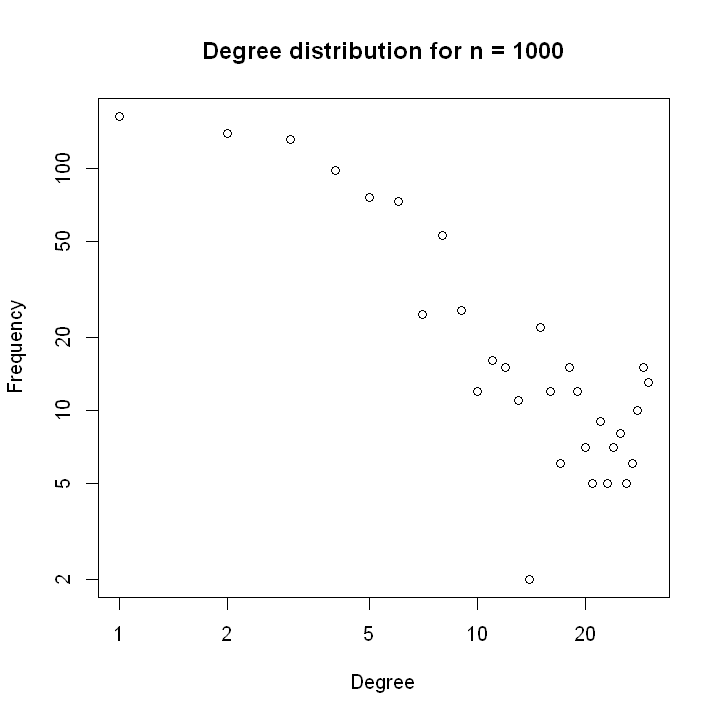

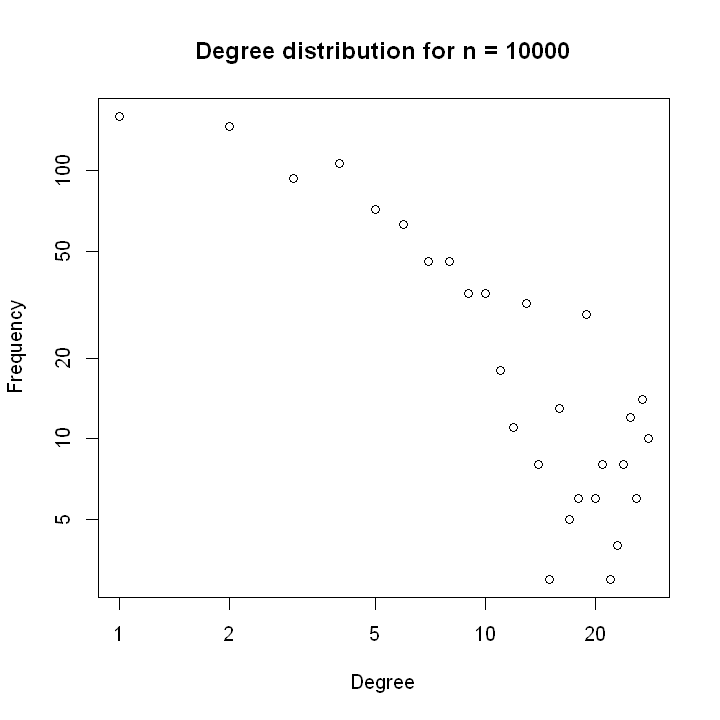

In [0]:
num_v = vcount(g)
num_e = ecount(g)

e_degree_dist <- list()
j_vertices <- list()

#for (idx in 1:length(degree_distribution(g))) {
for (idx in 1:1000) {
    sampled_v_idx = sample(1:num_v, 1)

    es = E(g)[sampled_v_idx %--% 1:num_v]
    adj_v = ends(g, es) # vertices j connected to node i (sampled_v_idx) by an edge
    adj_v2 = adj_v[which(adj_v != sampled_v_idx)] # vertices j


    #print(sampled_v_idx)
    #print(es)
    #print(adj_v)
    #print(adj_v2)

    j = sample(adj_v2, 1) 

    #print(j)

    j_edges = E(g)[j %--% 1:num_v]
    #print(j_edges)

    #this_deg = length(j_edges)
    #append(e_degree_dist, length(j_edges))
    e_degree_dist[[idx]] <- length(j_edges)
    j_vertices[[idx]] <- j
}

e_degree_dist = unlist(e_degree_dist, use.names=FALSE) # convert from list to vector

df = as.data.frame(table(e_degree_dist))

deg_dist = df$Freq
y_log_subg = c(log(deg_dist))
#length(y_log_subg)
y_log_subg[!is.finite(y_log_subg)] <- NA

degrees_subg <- log(1:length(deg_dist))
#degrees_subg <- log(1:1000)

linreg_subg = lm(y_log_subg ~ degrees_subg)
print(summary(linreg_subg))
plot(deg_dist,main="Degree distribution for n = 1000", xlab="Degree", ylab="Frequency", log="xy")
abline(linreg_subg)

e_degree_dist <- list()
j_vertices <- list()

#for (idx in 1:length(degree_distribution(g))) {
for (idx in 1:1000) {
    sampled_v_idx = sample(1:num_v, 1)

    es = E(g2)[sampled_v_idx %--% 1:num_v]
    adj_v = ends(g2, es) # vertices j connected to node i (sampled_v_idx) by an edge
    adj_v2 = adj_v[which(adj_v != sampled_v_idx)] # vertices j


    #print(sampled_v_idx)
    #print(es)
    #print(adj_v)
    #print(adj_v2)

    j = sample(adj_v2, 1) 

    #print(j)

    j_edges = E(g2)[j %--% 1:num_v]
    #print(j_edges)

    #this_deg = length(j_edges)
    #append(e_degree_dist, length(j_edges))
    e_degree_dist[[idx]] <- length(j_edges)
    j_vertices[[idx]] <- j
}

e_degree_dist = unlist(e_degree_dist, use.names=FALSE) # convert from list to vector

df = as.data.frame(table(e_degree_dist))

deg_dist = df$Freq
y_log_subg = c(log(deg_dist))
#length(y_log_subg)
y_log_subg[!is.finite(y_log_subg)] <- NA

degrees_subg <- log(1:length(deg_dist))
#degrees_subg <- log(1:1000)

linreg_subg = lm(y_log_subg ~ degrees_subg)
print(summary(linreg_subg))
plot(deg_dist,main="Degree distribution for n = 10000", xlab="Degree", ylab="Frequency", log="xy")
abline(linreg_subg)



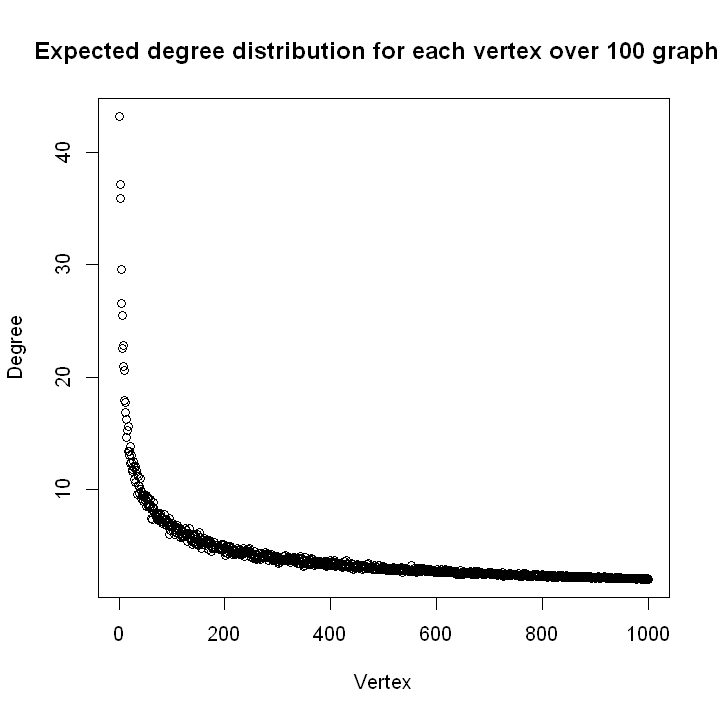

In [0]:
# (f)

# create n graphs 
n = 100
num_vtx = 1000
degrees <- matrix(0, nrow = n, ncol = num_vtx) # num graphs x num vertices in each graph 

for (i in 1:n) {
    g_i <- sample_pa(n = num_vtx, m = 2, directed = FALSE)
    #print(g_i)
    for (j in 1:num_vtx) {
        es = E(g_i)[j %--% 1:num_vtx]
        degrees[i, j] <- length(es) # put number of edges = degree into element
    }

}

y = colMeans(degrees)
plot(y, main="Expected degree distribution for each vertex over 100 graphs", xlab="Vertex", ylab="Degree")

[1] 1000
[1] 4985
[1] TRUE


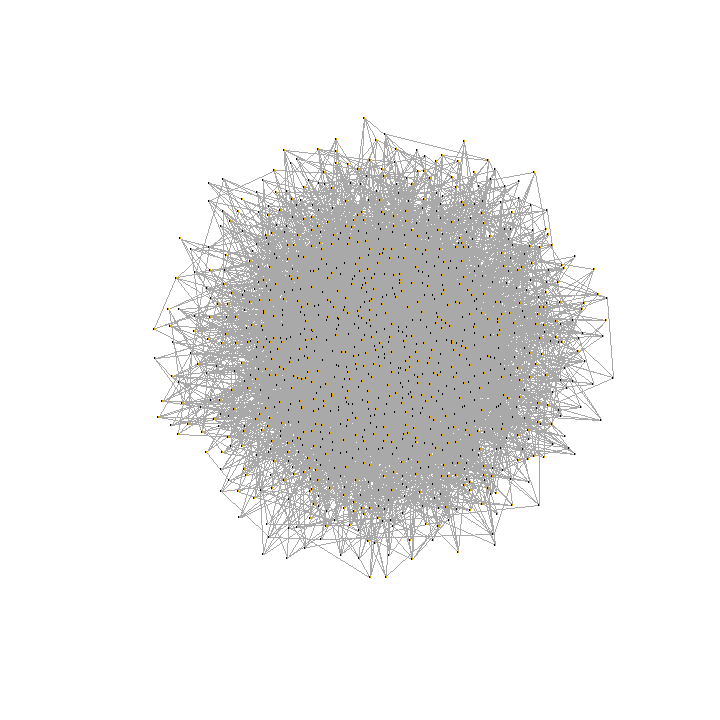

In [0]:
# m = 5
g <- sample_pa(n = 1000, m = 5, directed = FALSE)
plot(g, vertex.size = 1, vertex.label = NA)

# If, aside from the first vertex, each new vertex attaches to m = 1 old nodes, the graph must be connected.
# Alternatively, a tree is a connected graph that has m vertices and m-1 edges
print(vcount(g))
print(ecount(g))
print(is.connected(g))

[1] 0.2778536


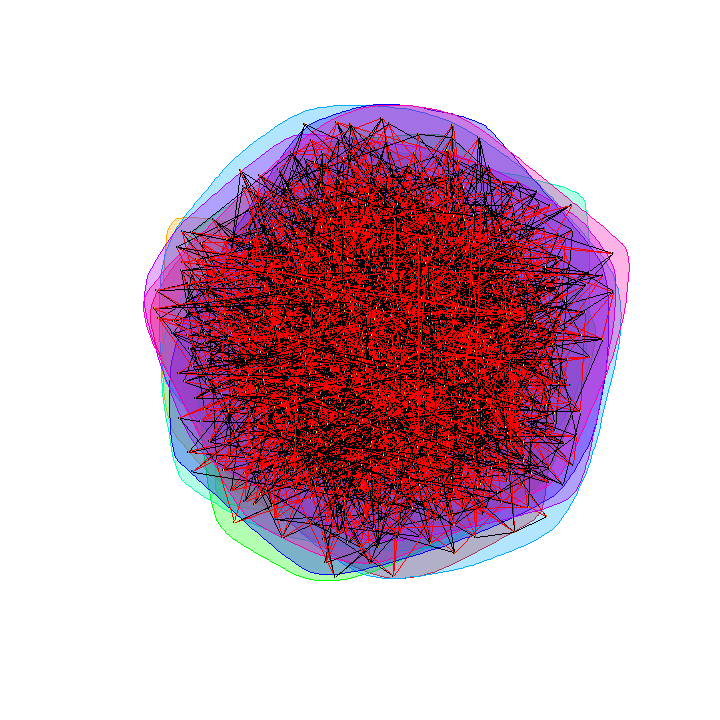

In [0]:
h <- cluster_fast_greedy(graph = g) # Returns 'communities' object
plot(h, g, vertex.size = 1, vertex.label = NA)
print(modularity(h))

[1] 0.2723327


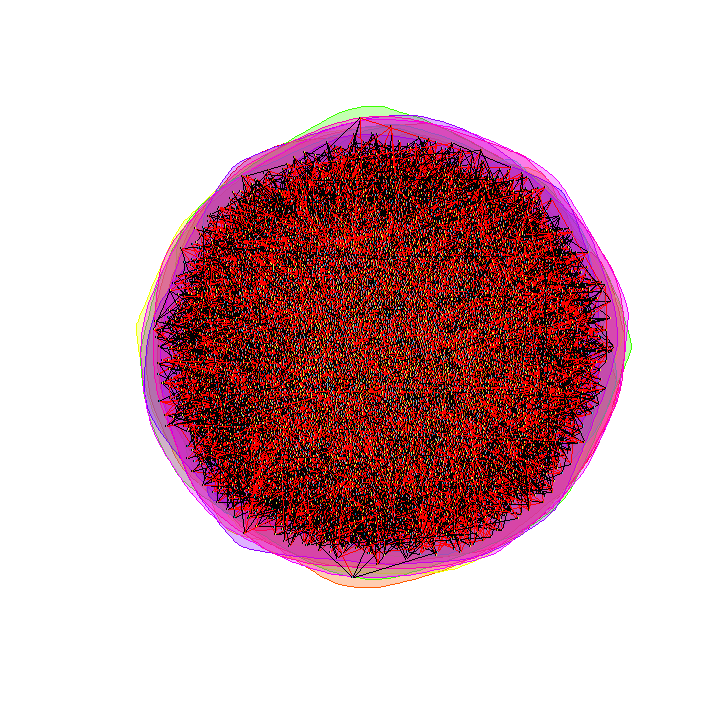

In [0]:
g2 <- sample_pa(n = 10000, m = 5, directed = FALSE)

h2 <- cluster_fast_greedy(graph = g2) # Returns 'communities' object
plot(h2, g2, vertex.size = 1, vertex.label = NA)
print(modularity(h2))

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"57 y values <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"135 y values <= 0 omitted from logarithmic plot"

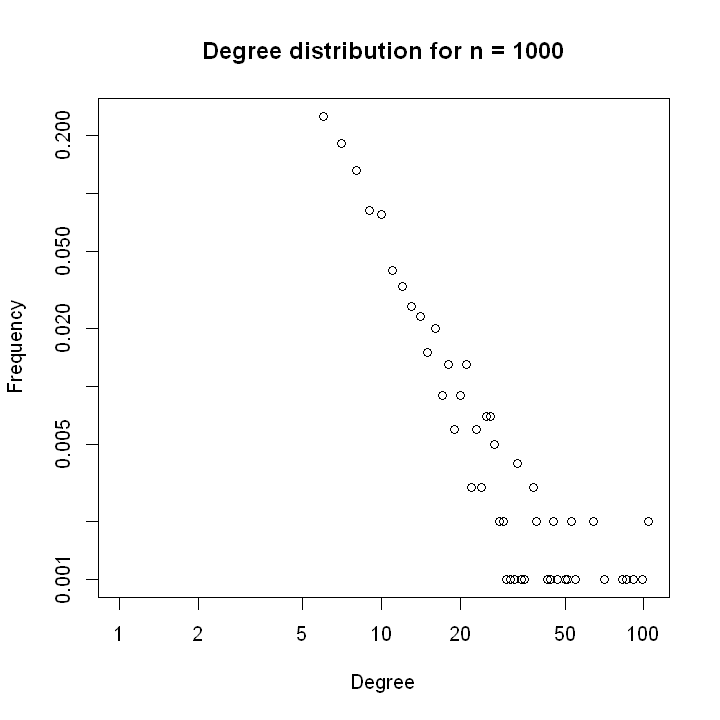


Call:
lm(formula = y_log ~ degrees)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3928 -0.5048  0.1399  0.4508  1.8124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.3577     0.4988   2.722  0.00919 ** 
degrees      -2.0207     0.1463 -13.815  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7164 on 45 degrees of freedom
  (57 observations deleted due to missingness)
Multiple R-squared:  0.8092,	Adjusted R-squared:  0.805 
F-statistic: 190.9 on 1 and 45 DF,  p-value: < 2.2e-16


Call:
lm(formula = y_log2 ~ degrees2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.59513 -0.52301  0.01943  0.48175  1.63639 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.69347    0.33934   4.991 2.37e-06 ***
degrees2    -2.28292    0.08298 -27.511  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 

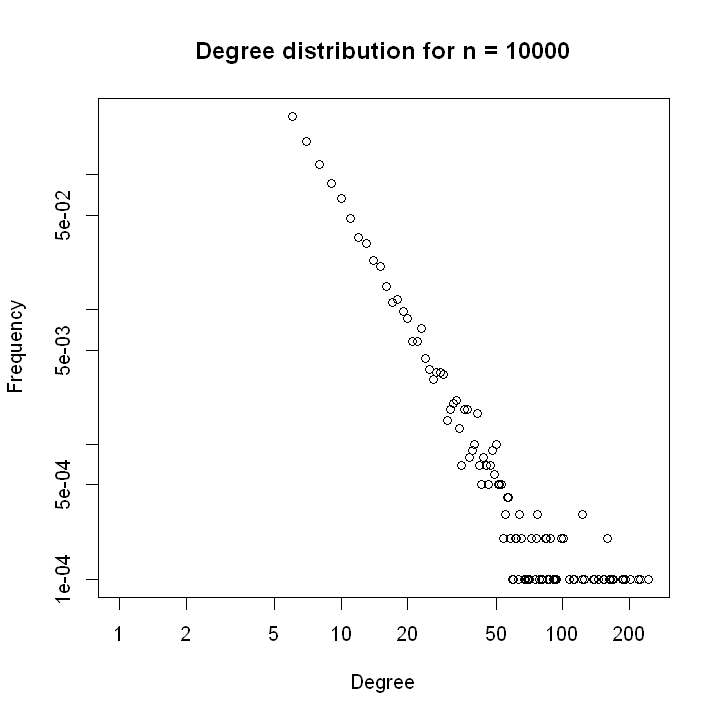

In [0]:
plot(degree_distribution(g),main="Degree distribution for n = 1000", xlab="Degree", ylab="Frequency", log="xy")
plot(degree_distribution(g2),main="Degree distribution for n = 10000", xlab="Degree", ylab="Frequency", log="xy")

y_log = c(log(degree_distribution(g)))
y_log[!is.finite(y_log)] <- NA
degrees <- log(1:length(degree_distribution(g)))

linreg = lm(y_log ~ degrees)
print(summary(linreg))
#plot(degree_distribution(g),main="Degree distribution for n = 1000", xlab="Degree", ylab="Frequency", log="xy")
#abline(linreg)

y_log2 = c(log(degree_distribution(g2)))
#print(which(y_log2==-Inf))
rmv_idx = which(y_log2 == -Inf)

#print(y_log2)
#print(y_log2[-rmv_idx])

#y_log2 <- y_log2[-rmv_idx]
y_log2[!is.finite(y_log2)] <- NA

degrees2 <- log(1:length(degree_distribution(g2)))
#degrees2 <- degrees2[-rmv_idx]

linreg2 = lm(y_log2 ~ degrees2)
print(summary(linreg2))
#plot(degree_distribution(g2),main="Degree distribution for n = 10000", xlab="Degree", ylab="Frequency", log="xy")
#abline(linreg2)


Call:
lm(formula = y_log_subg ~ degrees_subg)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1979 -0.4516  0.1732  0.4174  1.3891 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.1019     0.2982  17.110  < 2e-16 ***
degrees_subg  -0.8715     0.0981  -8.884 1.85e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5888 on 45 degrees of freedom
Multiple R-squared:  0.6369,	Adjusted R-squared:  0.6288 
F-statistic: 78.92 on 1 and 45 DF,  p-value: 1.849e-11


Call:
lm(formula = y_log_subg ~ degrees_subg)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.62438 -0.20991  0.01514  0.50269  1.24203 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.5589     0.3256   17.07  < 2e-16 ***
degrees_subg  -1.0980     0.1033  -10.63 1.55e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6653 on 51 degrees o

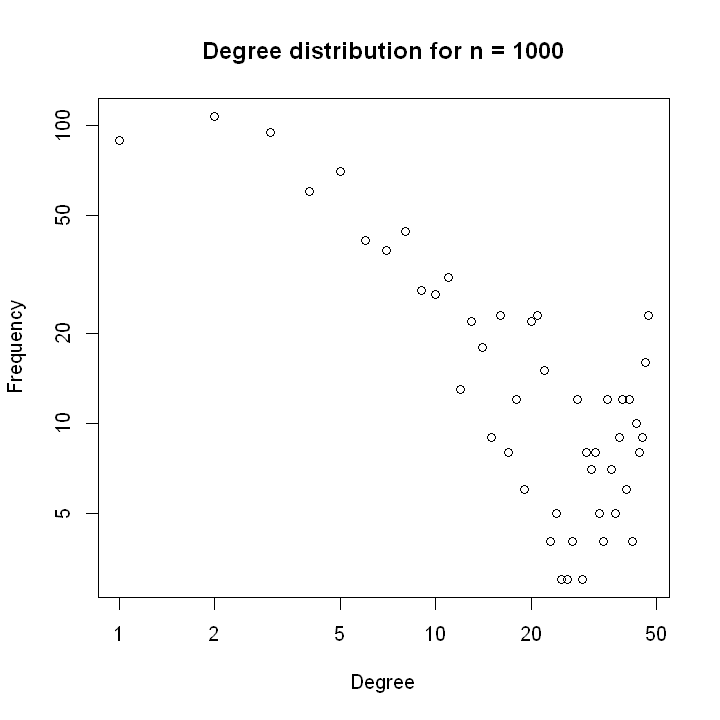

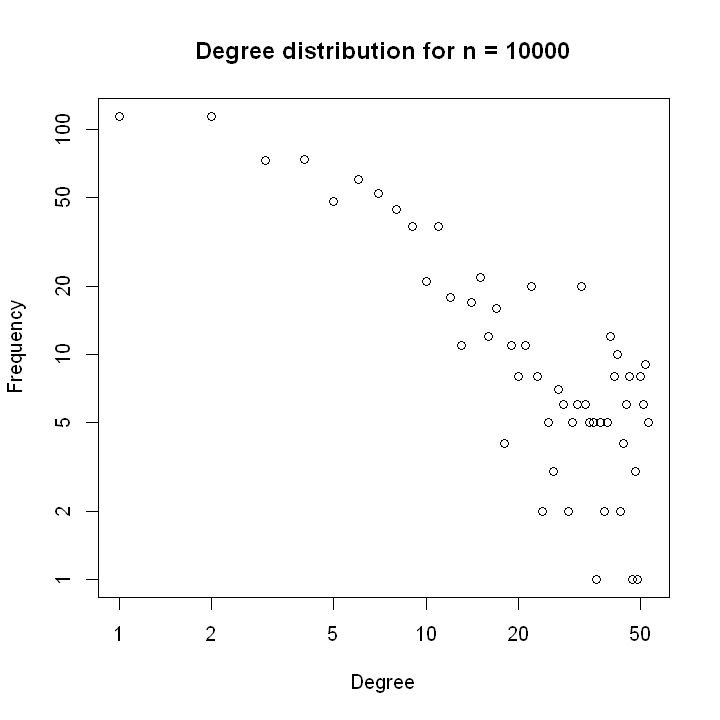

In [0]:
num_v = vcount(g)
num_e = ecount(g)

e_degree_dist <- list()
j_vertices <- list()

#for (idx in 1:length(degree_distribution(g))) {
for (idx in 1:1000) {
    sampled_v_idx = sample(1:num_v, 1)

    es = E(g)[sampled_v_idx %--% 1:num_v]
    adj_v = ends(g, es) # vertices j connected to node i (sampled_v_idx) by an edge
    adj_v2 = adj_v[which(adj_v != sampled_v_idx)] # vertices j


    #print(sampled_v_idx)
    #print(es)
    #print(adj_v)
    #print(adj_v2)

    j = sample(adj_v2, 1) 

    #print(j)

    j_edges = E(g)[j %--% 1:num_v]
    #print(j_edges)

    #this_deg = length(j_edges)
    #append(e_degree_dist, length(j_edges))
    e_degree_dist[[idx]] <- length(j_edges)
    j_vertices[[idx]] <- j
}

e_degree_dist = unlist(e_degree_dist, use.names=FALSE) # convert from list to vector

df = as.data.frame(table(e_degree_dist))

deg_dist = df$Freq
y_log_subg = c(log(deg_dist))
#length(y_log_subg)
y_log_subg[!is.finite(y_log_subg)] <- NA

degrees_subg <- log(1:length(deg_dist))
#degrees_subg <- log(1:1000)

linreg_subg = lm(y_log_subg ~ degrees_subg)
print(summary(linreg_subg))
plot(deg_dist,main="Degree distribution for n = 1000", xlab="Degree", ylab="Frequency", log="xy")
abline(linreg_subg)

e_degree_dist <- list()
j_vertices <- list()

#for (idx in 1:length(degree_distribution(g))) {
for (idx in 1:1000) {
    sampled_v_idx = sample(1:num_v, 1)

    es = E(g2)[sampled_v_idx %--% 1:num_v]
    adj_v = ends(g2, es) # vertices j connected to node i (sampled_v_idx) by an edge
    adj_v2 = adj_v[which(adj_v != sampled_v_idx)] # vertices j


    #print(sampled_v_idx)
    #print(es)
    #print(adj_v)
    #print(adj_v2)

    j = sample(adj_v2, 1) 

    #print(j)

    j_edges = E(g2)[j %--% 1:num_v]
    #print(j_edges)

    #this_deg = length(j_edges)
    #append(e_degree_dist, length(j_edges))
    e_degree_dist[[idx]] <- length(j_edges)
    j_vertices[[idx]] <- j
}

e_degree_dist = unlist(e_degree_dist, use.names=FALSE) # convert from list to vector

df = as.data.frame(table(e_degree_dist))

deg_dist = df$Freq
y_log_subg = c(log(deg_dist))
#length(y_log_subg)
y_log_subg[!is.finite(y_log_subg)] <- NA

degrees_subg <- log(1:length(deg_dist))
#degrees_subg <- log(1:1000)

linreg_subg = lm(y_log_subg ~ degrees_subg)
print(summary(linreg_subg))
plot(deg_dist,main="Degree distribution for n = 10000", xlab="Degree", ylab="Frequency", log="xy")
abline(linreg_subg)

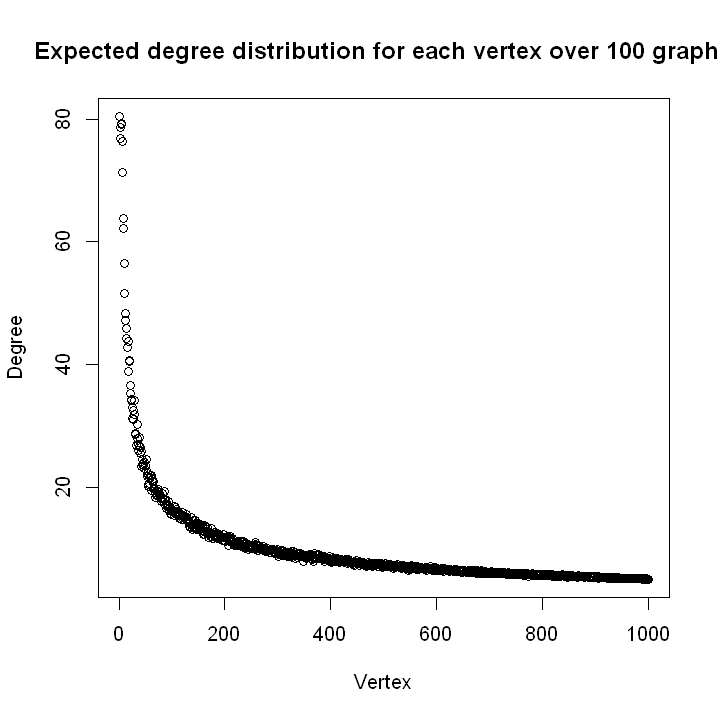

In [0]:
# (f)

# create n graphs 
n = 100
num_vtx = 1000
degrees <- matrix(0, nrow = n, ncol = num_vtx) # num graphs x num vertices in each graph 

for (i in 1:n) {
    g_i <- sample_pa(n = num_vtx, m = 5, directed = FALSE)
    #print(g_i)
    for (j in 1:num_vtx) {
        es = E(g_i)[j %--% 1:num_vtx]
        degrees[i, j] <- length(es) # put number of edges = degree into element
    }

}

y = colMeans(degrees)
plot(y, main="Expected degree distribution for each vertex over 100 graphs", xlab="Vertex", ylab="Degree")

### Finally part (h)

[1] 0.8582572


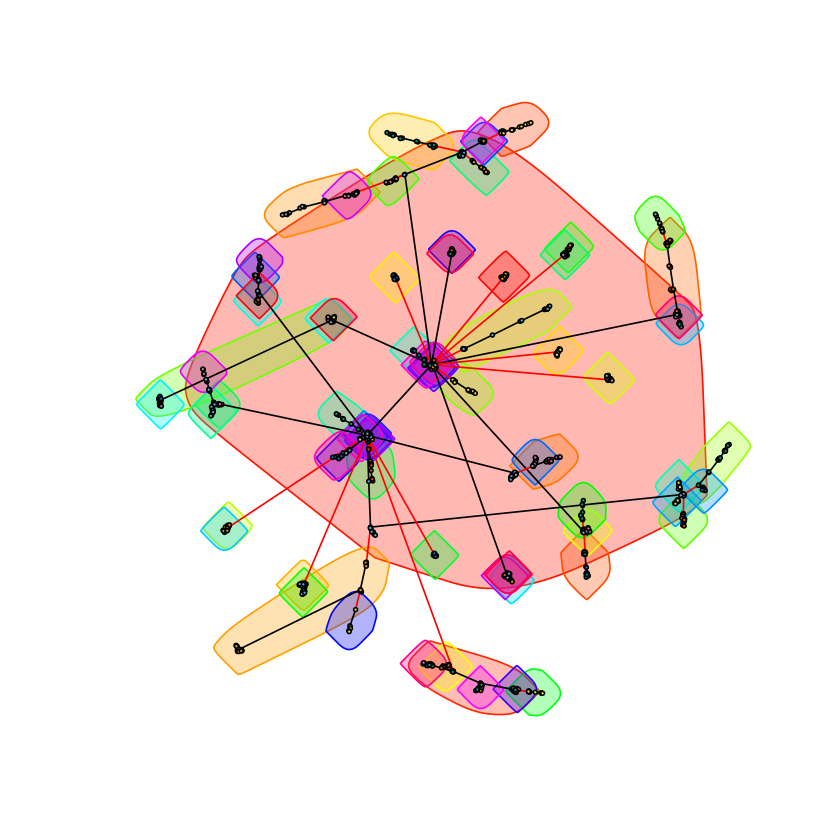

[1] 0.7225262


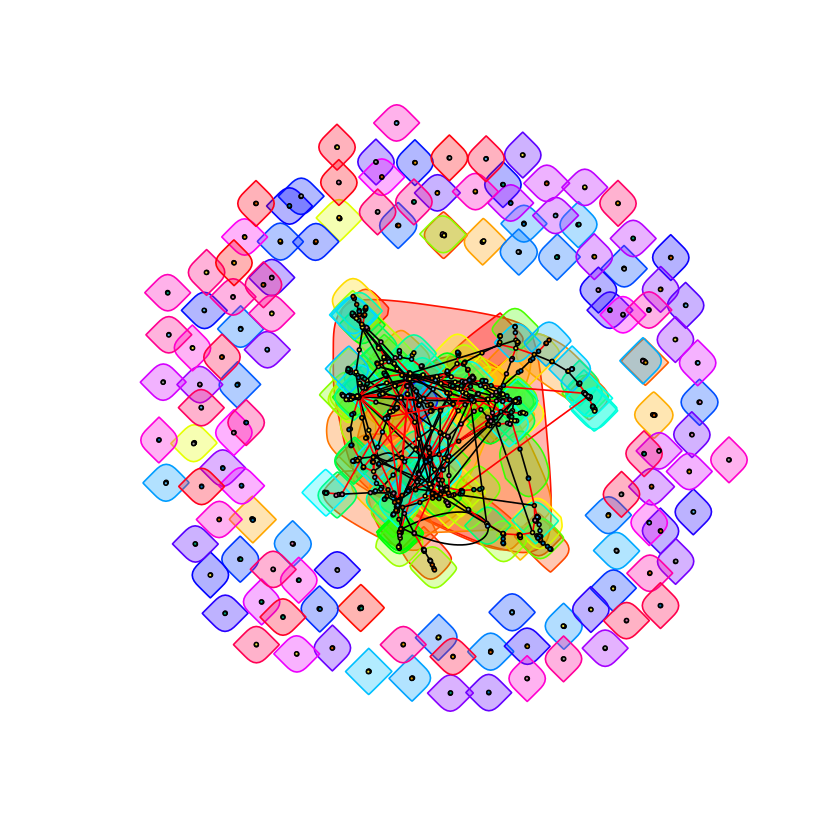

In [0]:
g_h <- sample_pa(n = 1000, m = 1, directed = FALSE)
degree_seq <- list()

for (i in 1:1000) {
    es = E(g_h)[i %--% 1:1000]
    degree_seq[i] <- length(es)
}

h_h <- cluster_walktrap(graph = g_h) # Returns 'communities' object
plot(h_h, g_h, vertex.size = 1, vertex.label = NA)
print(modularity(h_h))

g_h2 <- sample_degseq(degree_seq)
h_h2 <- cluster_walktrap(graph = g_h2)
plot(h_h2, g_h2, vertex.size=1, vertex.label=NA)
print(modularity(h_h2))

### Q3. Create a modified preferential attachment model that penalizes the age of a node

[1] "Power law exponent =  2.09738995850708"


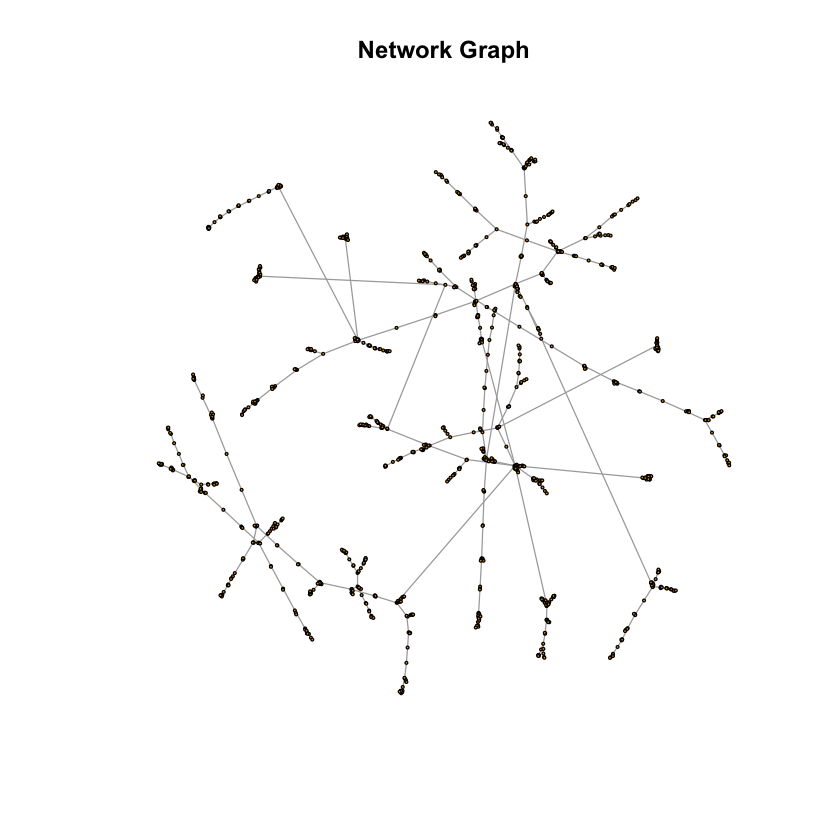

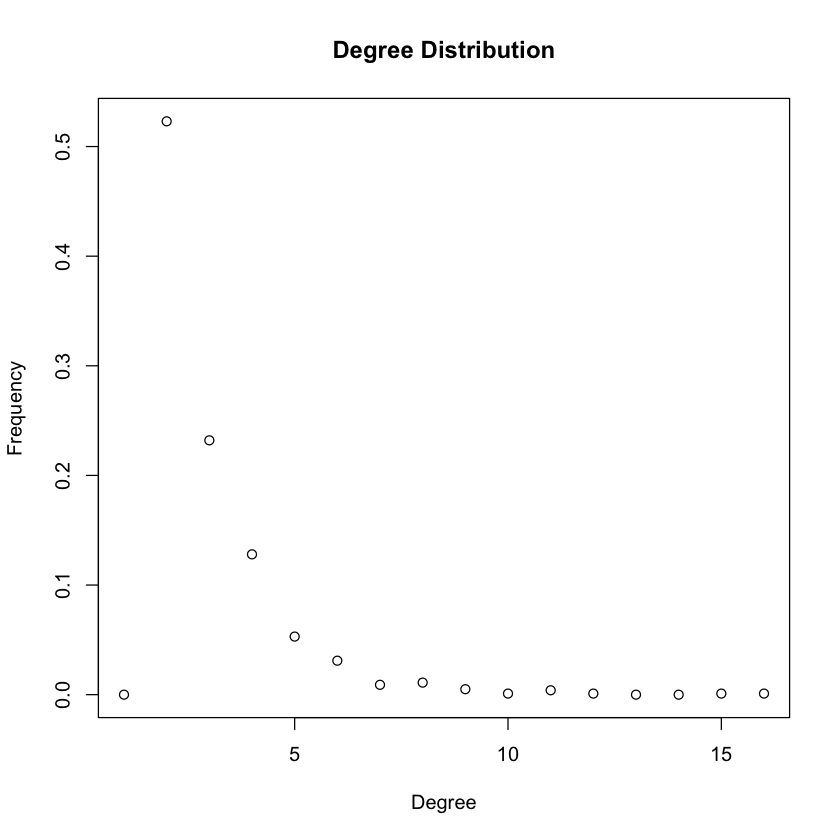

In [0]:
# part (a)
g <- sample_pa_age(n = 1000, pa.exp = 1, aging.exp = -1, m = 1, directed = FALSE)
print(paste("Power law exponent = ", fit_power_law(degree(g), xmin=1)$alpha))
plot(g, main="Network Graph", vertex.size=1, vertex.label=NA)
plot(degree.distribution(g), main="Degree Distribution",  xlab="Degree", ylab="Frequency")

[1] "Modularity = 0.935457980503028"


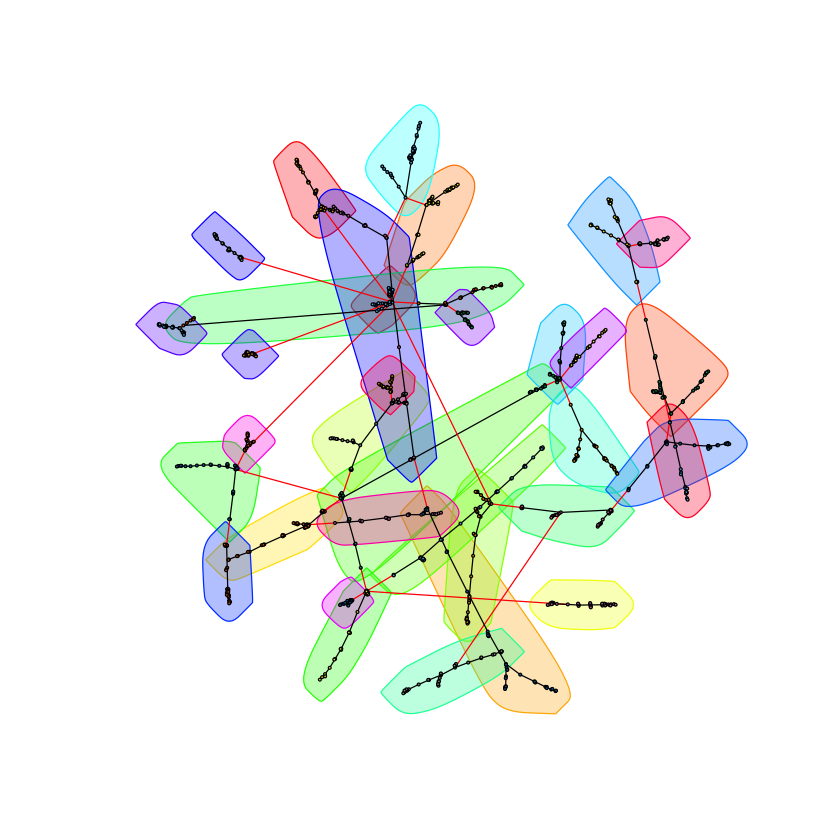

In [0]:
# part (b)
fc <- cluster_fast_greedy(g)
plot(fc, g, vertex.size = 1, vertex.label = NA)
print(paste("Modularity =", modularity(fc)))

## Part 2: Random Walk on Networks

### Q1. Random walk on Erdös-Rényi networks

In [0]:
# part (a)
library ("igraph")
library('igraph')
library('Matrix')
library('pracma')

get_gcc = function(g) {
    cl = clusters(g)
    gcc = induced_subgraph(g, which(cl$membership == which.max(cl$csize)))
    return(gcc)
}

my_random_walk = function(graph, n_steps=100, n_iter=1000){
    degrees = c()
    dists = c()
    gcc = get_gcc(graph)
    for(i in 1:n_iter){
        dist = c()
        for(t in c(1:n_steps)+1){
            start_node = sample(V(gcc),1)
            walk = random_walk(graph=gcc, start=start_node, steps=t)
            dist = c(dist, distances(graph=gcc, v=start_node, to=tail(walk, n=1)))
        }
        degrees = rbind(degrees, degree(gcc, tail(walk, n=1))) #contains degree of end node
        dists = rbind(dists, dist)
    }
    return (list(degrees=degrees, dists=dists))
}

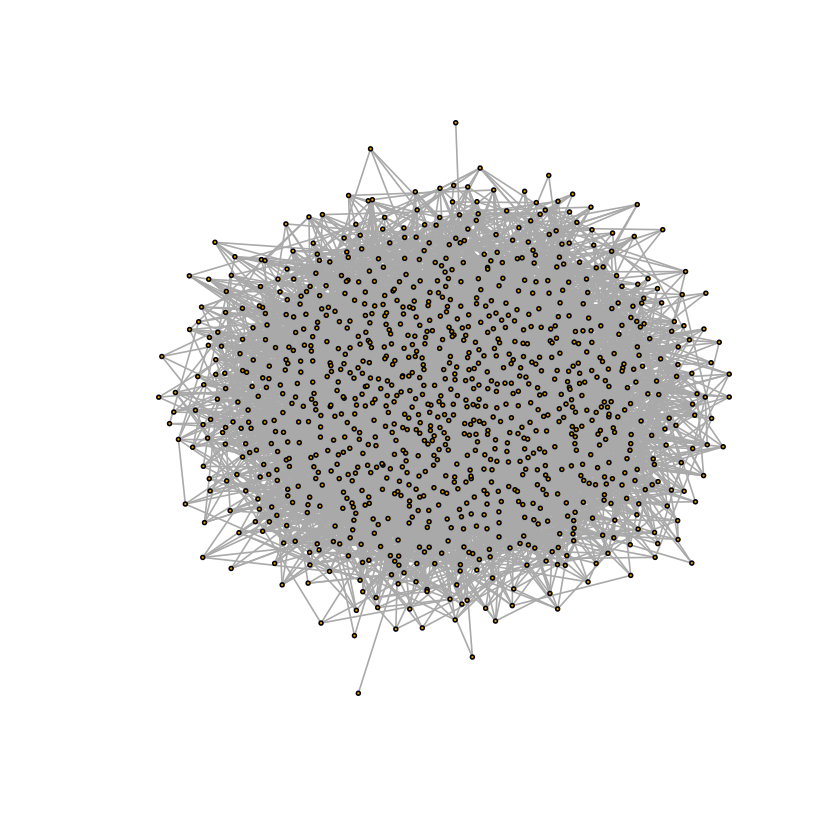

In [0]:
g = sample_gnp(n=1000, p=0.01, directed=FALSE, loops=FALSE)
gcc = get_gcc(g)
plot(gcc, vertex.size=1, vertex.label=NA)

In [0]:
# part (b)

results = my_random_walk(g)
degrees = results$degrees
dists = results$dists

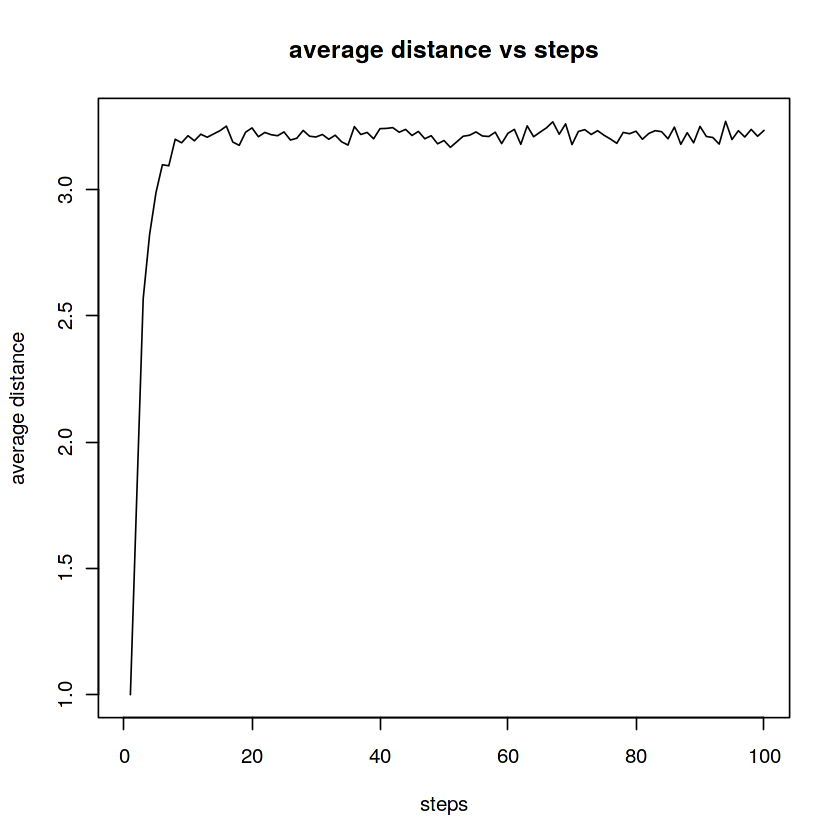

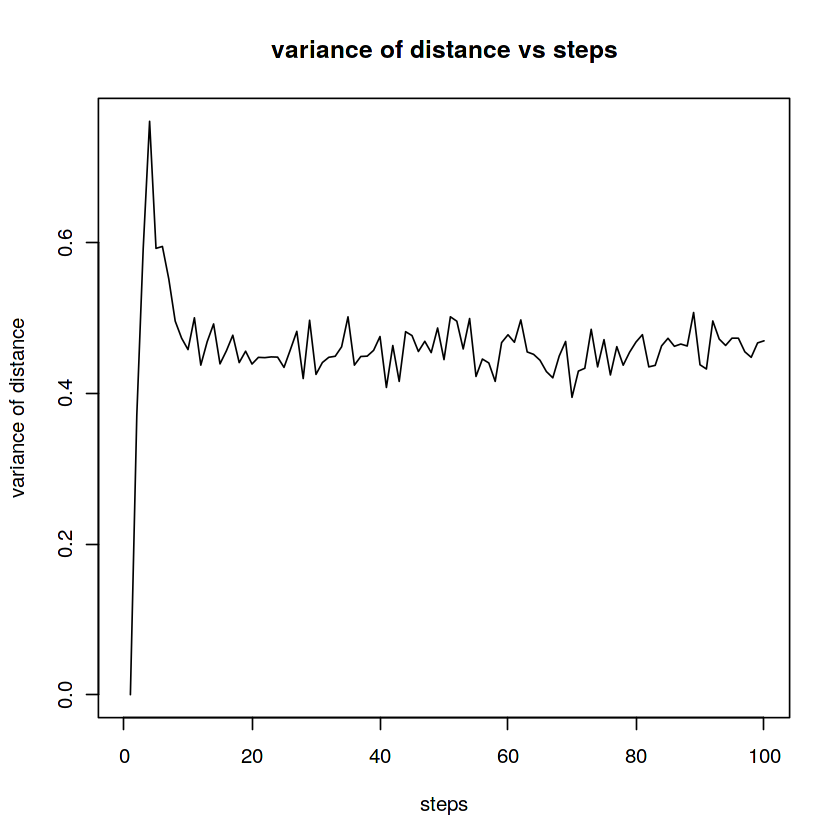

In [0]:
n_steps = ncol(dists)
plot(x=1:n_steps, y=colMeans(dists), type="l", xlim=c(0,n_steps),
     main="average distance vs steps", xlab="steps", ylab="average distance")
plot(x=1:n_steps, y=apply(dists, 2, var), type="l", xlim=c(0,n_steps),
     main="variance of distance vs steps", xlab="steps", ylab="variance of distance")


Warning message in hist.default(degrees, breaks = 0:(max(degrees) + 1), right = FALSE, :
“argument ‘freq’ is not made use of”

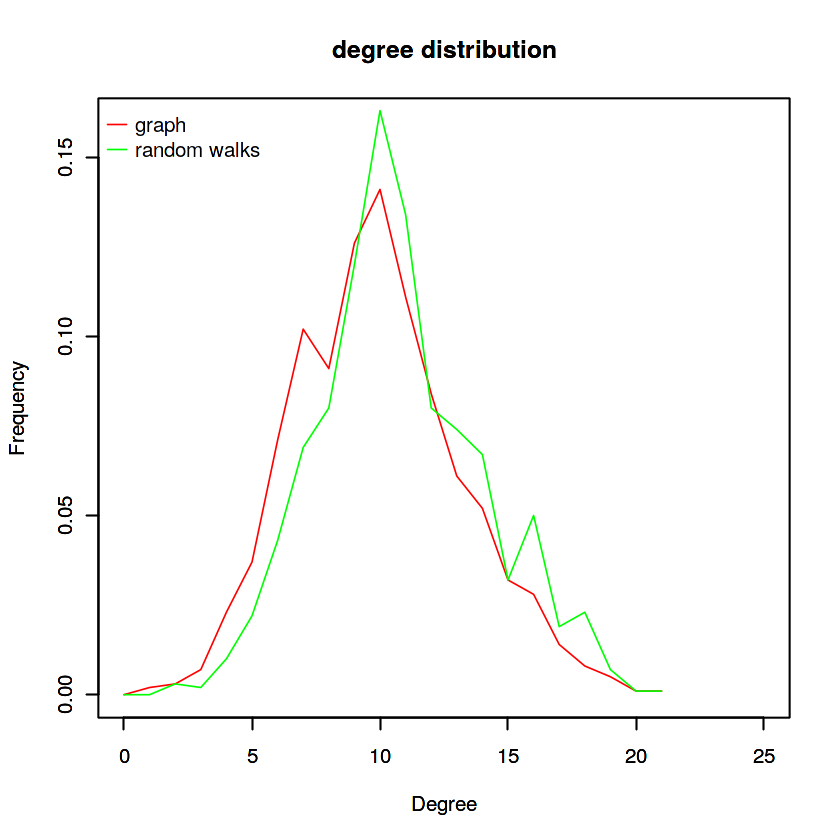

In [0]:
# part (c)
h=hist(degrees, breaks=0:(max(degrees)+1), right=FALSE, freq=FALSE, plot=FALSE)
plot(x=0:(length(degree_distribution(gcc))-1), y=degree_distribution(gcc),
     col="red", type="l", xlim=c(0,25), ylim=c(0,0.16),
     main="degree distribution", xlab="Degree", ylab="Frequency")
par(new=TRUE)
plot(0:max(degrees),h$density, col="green", type="l", xlim=c(0,25), ylim=c(0,0.16),
     main="degree distribution", xlab="Degree", ylab="Frequency")
legend(x="topleft", legend=c("graph","random walks"), col=c("red","green"), lty=c(1,1), bty="n")
# print(h)
# print(degree_distribution(gcc))

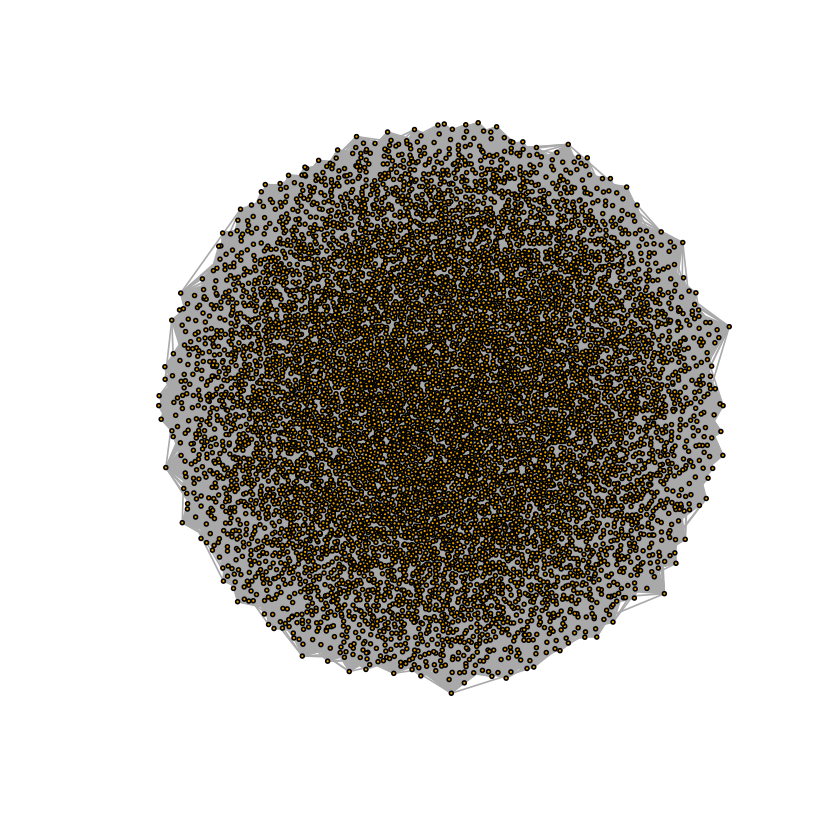

In [0]:
# part(d)
g = sample_gnp(n=10000, p=0.01, directed=FALSE, loops=FALSE)
gcc = get_gcc(g)
plot(gcc, vertex.size=1, vertex.label=NA)

In [0]:
results = my_random_walk(g)
degrees = results$degrees
dists = results$dists


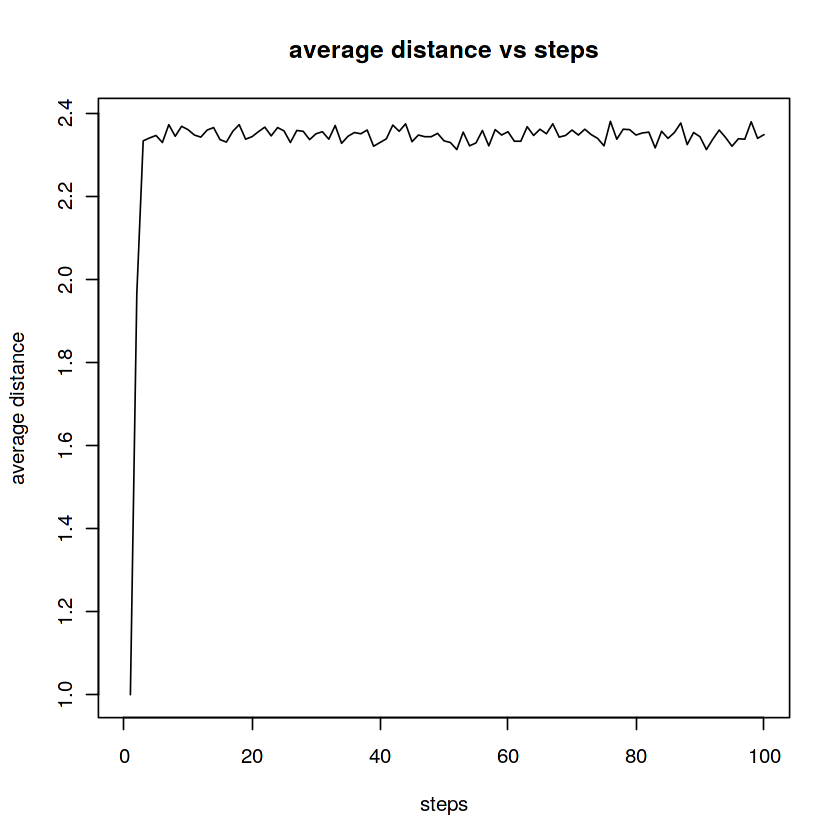

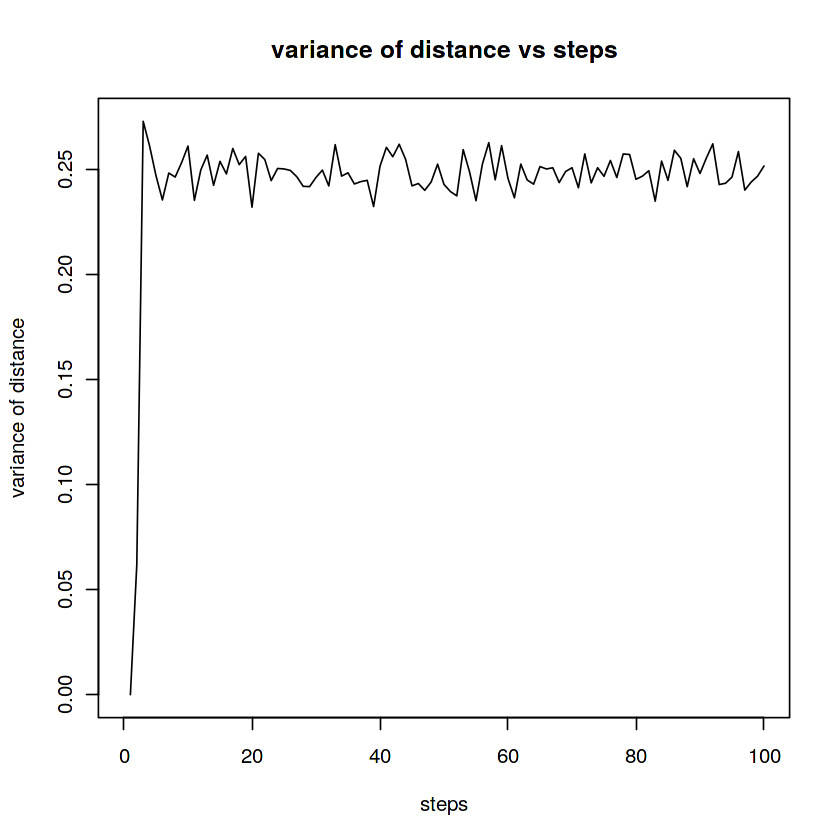

In [0]:
plot(x=1:n_steps, y=colMeans(dists), type="l", xlim=c(0,n_steps),
     main="average distance vs steps", xlab="steps", ylab="average distance")
plot(x=1:n_steps, y=apply(dists, 2, var), type="l", xlim=c(0,n_steps),
     main="variance of distance vs steps", xlab="steps", ylab="variance of distance")


### Q2. Random walk on networks with fat-tailed degree distribution

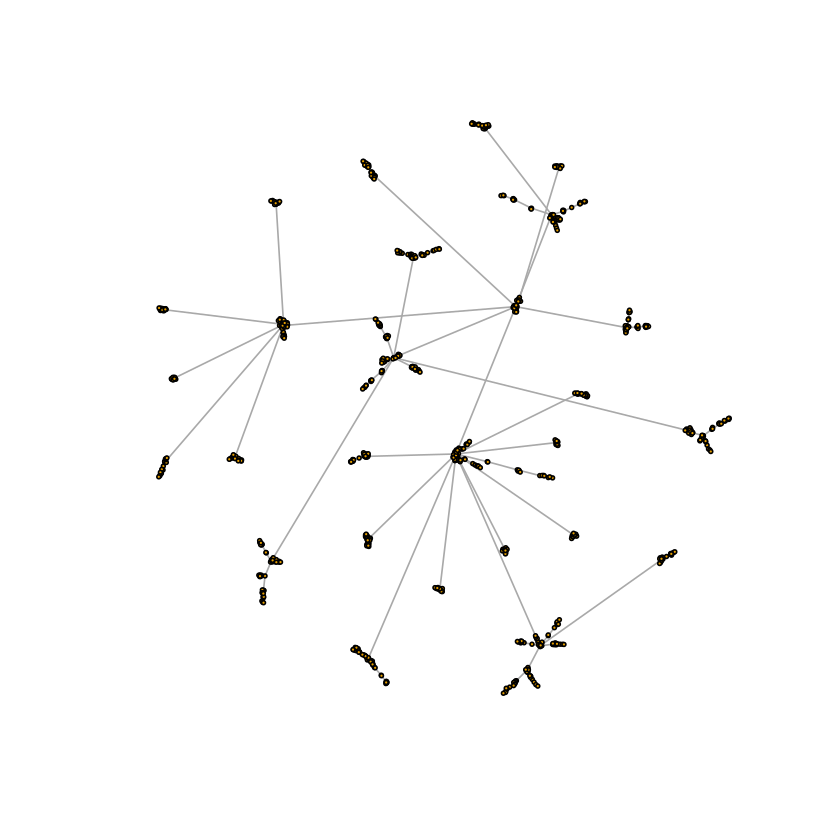

In [0]:
# part (a)
g = sample_pa(n=1000, m=1, directed = FALSE)
gcc = get_gcc(g)
plot(gcc, vertex.size=1, vertex.label=NA)


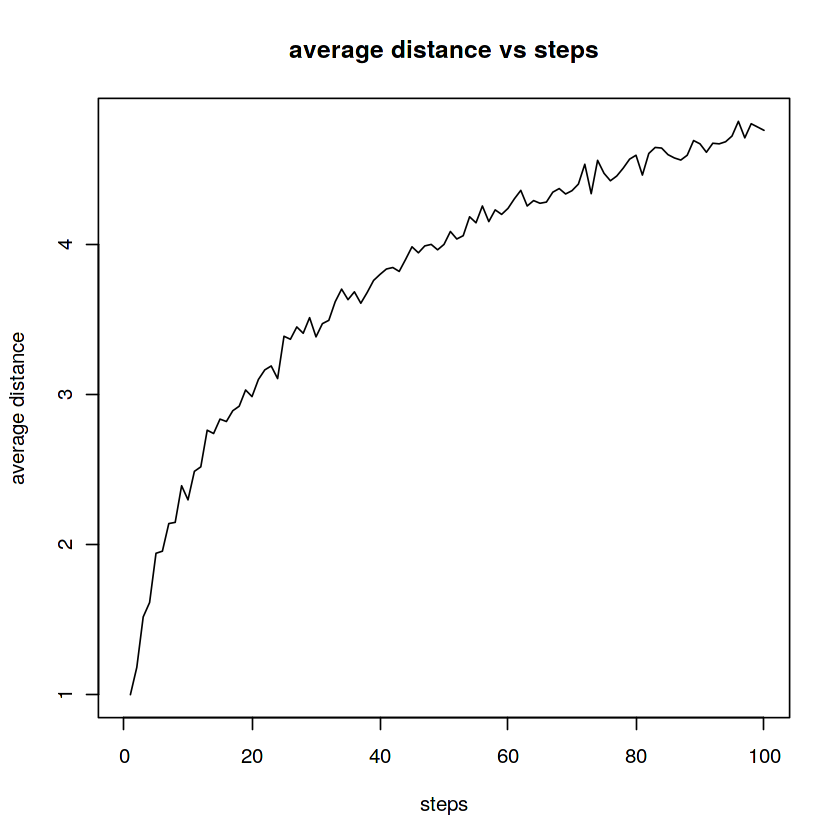

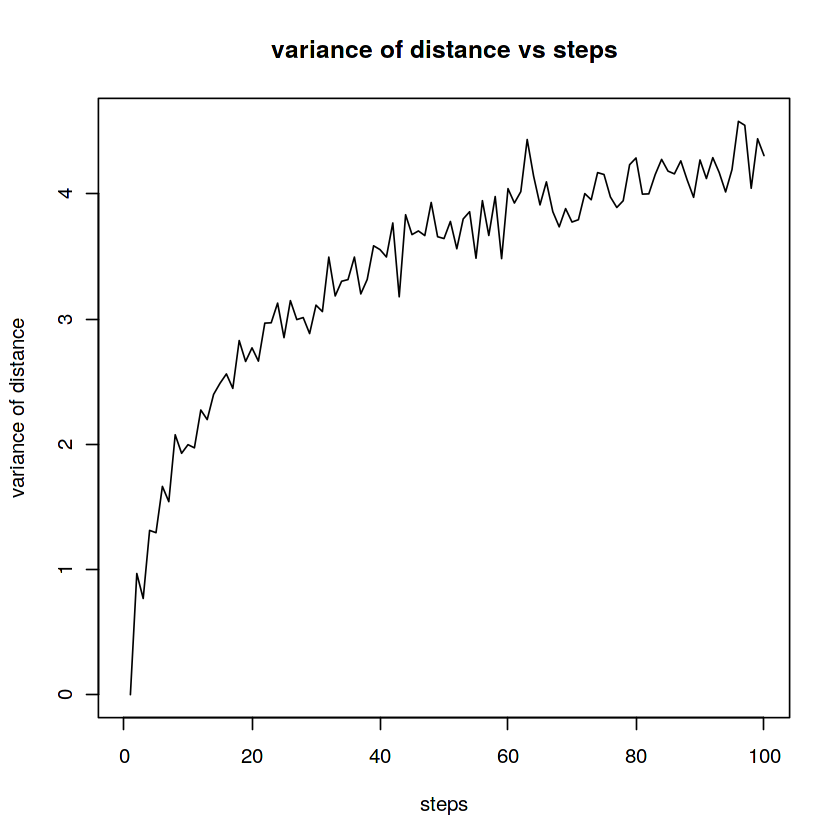

In [0]:
# part (b)
results = my_random_walk(g)
degrees = results$degrees
dists = results$dists

plot(x=1:n_steps, y=colMeans(dists), type="l", xlim=c(0,n_steps),
     main="average distance vs steps", xlab="steps", ylab="average distance")
plot(x=1:n_steps, y=apply(dists, 2, var), type="l", xlim=c(0,n_steps),
     main="variance of distance vs steps", xlab="steps", ylab="variance of distance")


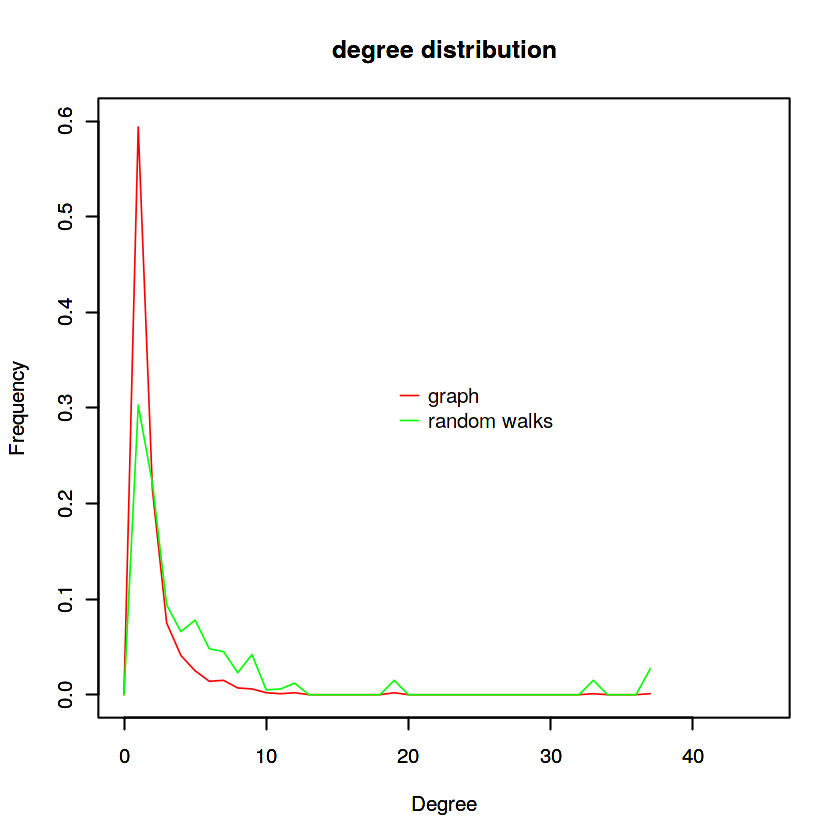

In [0]:
# part (c)
h=hist(degrees, breaks=0:(max(degrees)+1), right=FALSE, plot=FALSE)
plot(x=0:(length(degree_distribution(gcc))-1), y=degree_distribution(gcc),
     col="red", type="l", xlim=c(0,45), ylim=c(0,0.6), 
     main="degree distribution", xlab="Degree", ylab="Frequency")
par(new=TRUE)
plot(0:max(degrees),h$density, col="green", type="l", xlim=c(0,45), ylim=c(0,0.6),
     main="degree distribution", xlab="Degree", ylab="Frequency")
legend(x="center", legend=c("graph","random walks"), col=c("red","green"), lty=c(1,1), bty="n")
# print(degree_distribution(gcc))
# print(h)


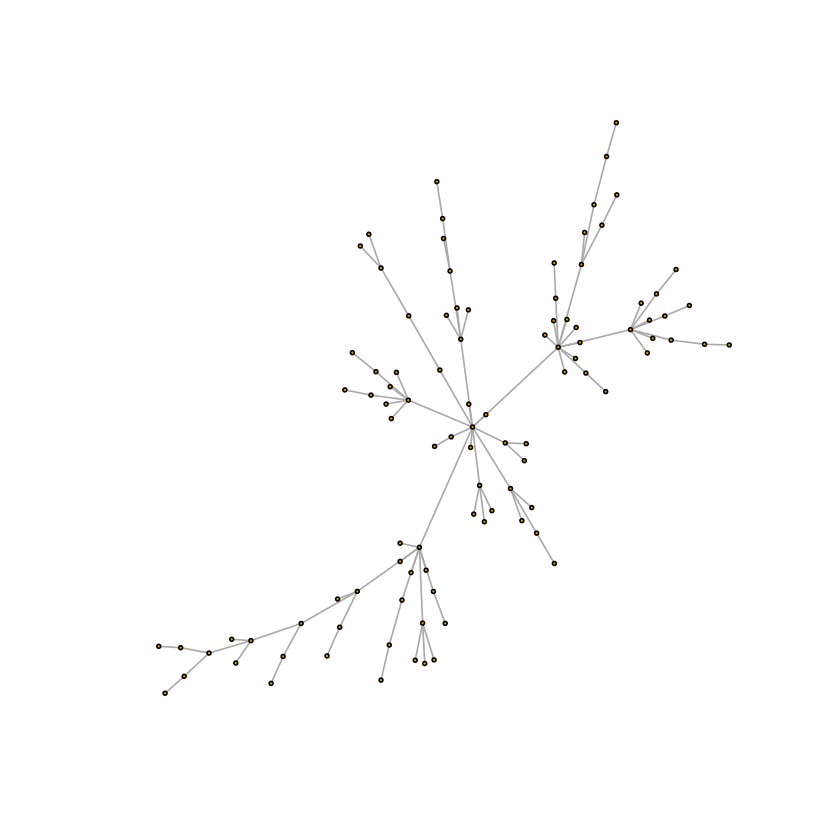

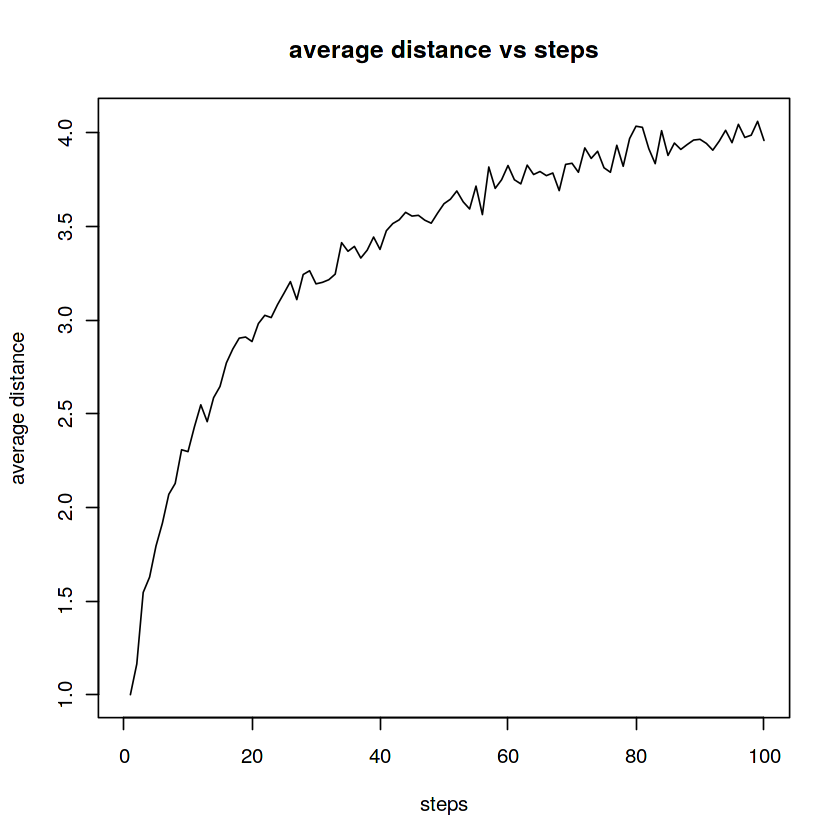

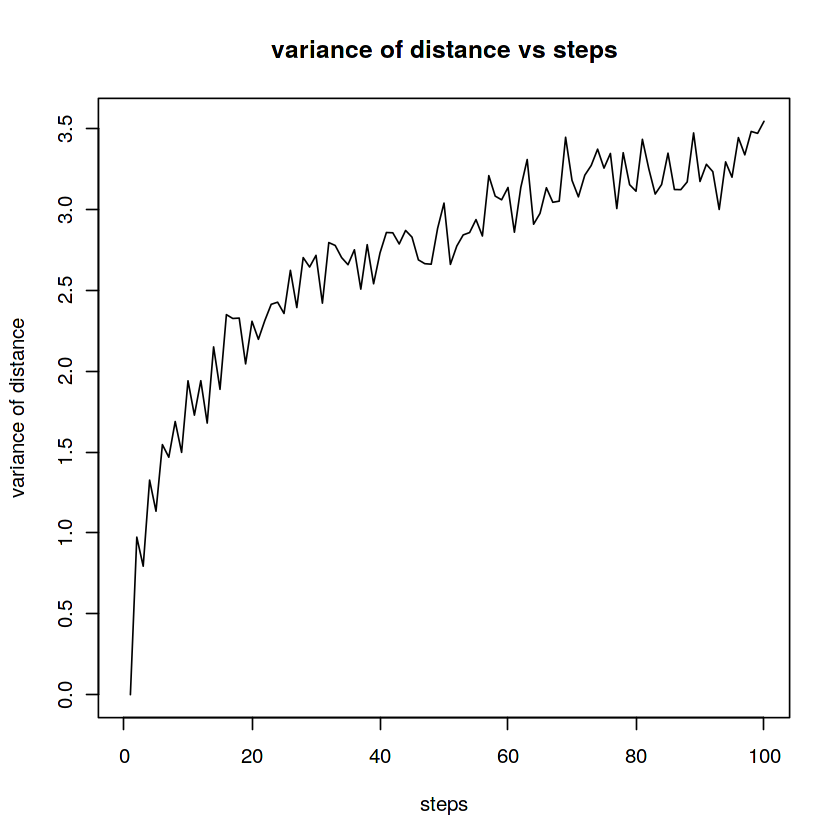

In [0]:
# part (d)
g = sample_pa(n=100, m=1, directed = FALSE)
gcc = get_gcc(g)
plot(gcc, vertex.size=1, vertex.label=NA)

results = my_random_walk(g)
degrees = results$degrees
dists = results$dists

plot(x=1:n_steps, y=colMeans(dists), type="l", xlim=c(0,n_steps),
     main="average distance vs steps", xlab="steps", ylab="average distance")
plot(x=1:n_steps, y=apply(dists, 2, var), type="l", xlim=c(0,n_steps),
     main="variance of distance vs steps", xlab="steps", ylab="variance of distance")


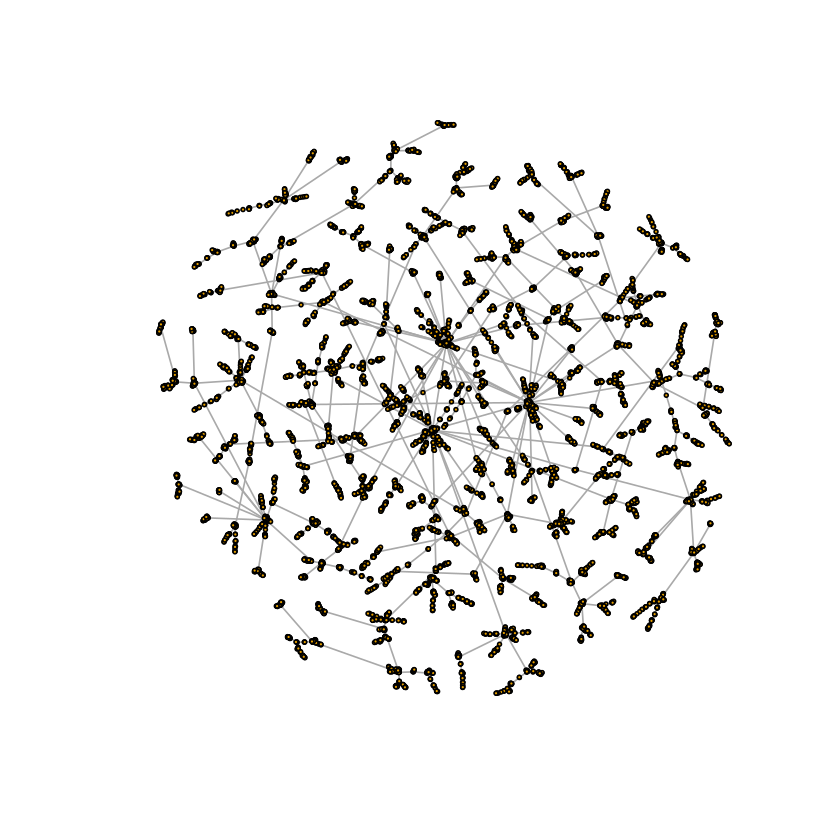

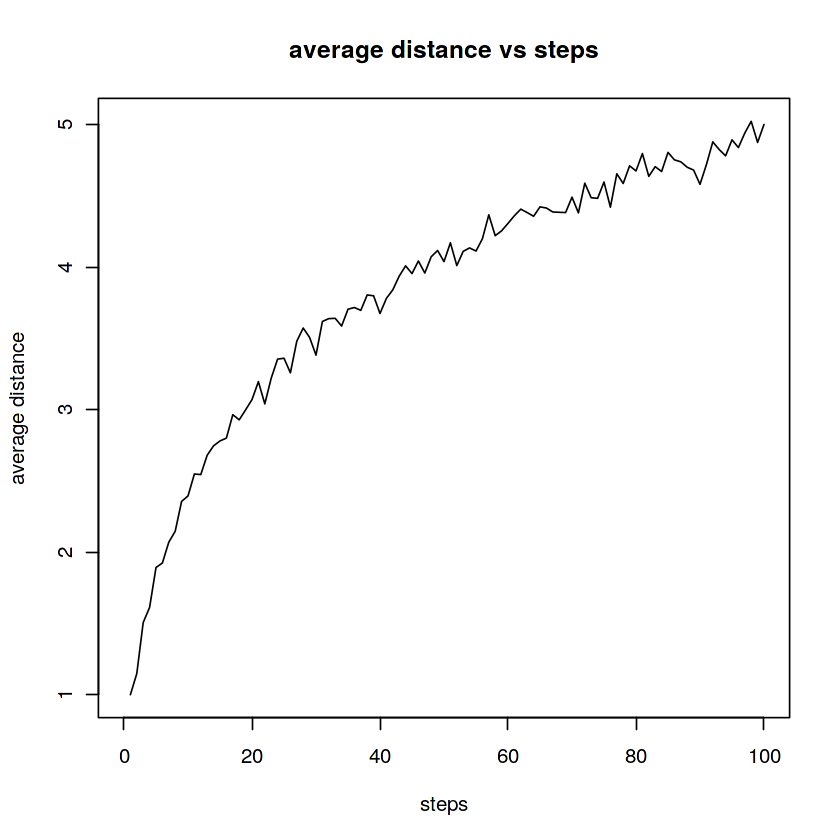

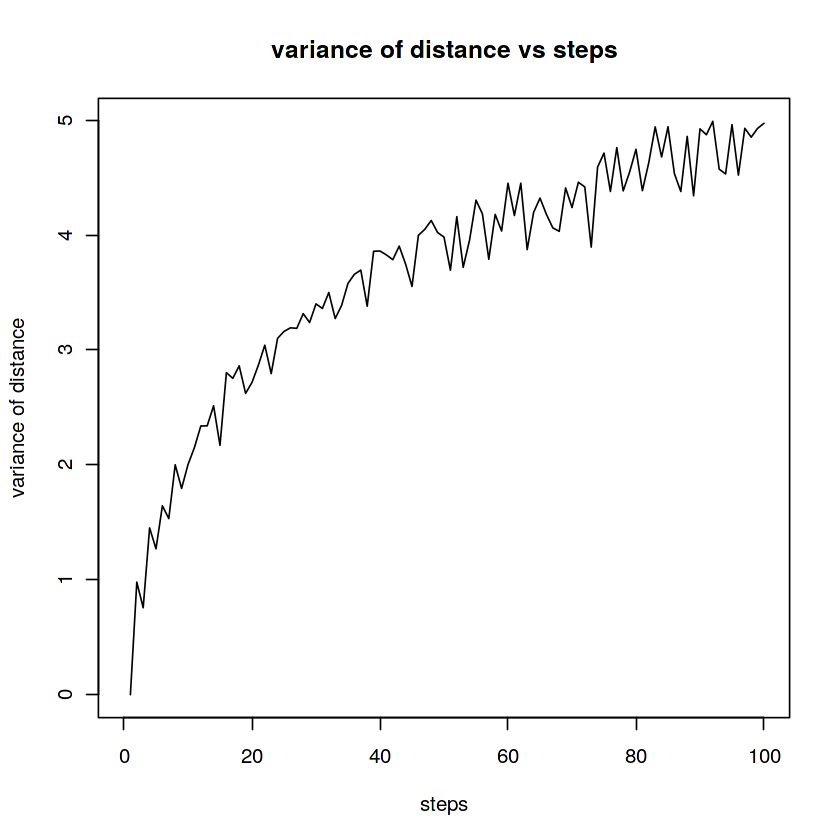

In [0]:
g = sample_pa(n=10000, m=1, directed = FALSE)
gcc = get_gcc(g)
plot(gcc, vertex.size=1, vertex.label=NA)

results = my_random_walk(g)
degrees = results$degrees
dists = results$dists

plot(x=1:n_steps, y=colMeans(dists), type="l", xlim=c(0,n_steps),
     main="average distance vs steps", xlab="steps", ylab="average distance")
plot(x=1:n_steps, y=apply(dists, 2, var), type="l", xlim=c(0,n_steps),
     main="variance of distance vs steps", xlab="steps", ylab="variance of distance")


### Q3. PageRank and Q4. Personalized PageRank

In [0]:
library ("igraph")
library('Matrix')
library('pracma')
library('resample')

In [0]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [0]:
random_walk = function (g, steps, start_node, transition_matrix = NULL, teleport = 0,
                       teleport_type="stimulate_pagerank",probability = NULL, medians=NULL)
{
  v_nodes = rep(0,steps)
  if(is.null(transition_matrix))
      transition_matrix = create_transition_matrix(g)
  
  v <- start_node
  for(index in 1:steps)
  {
    if (runif(1) < teleport) {
        if (teleport_type == "stimulate_pagerank") #for Question3, part(a),(b)
        {
            v = sample(1:vcount(g),1)
        }
        else if (teleport_type == "pagerank") #for Question4, part(a)
        {
            v = sample(1:vcount(g),1,prob = probability)
        }
        else if (teleport_type == "median_pagerank") #for Question4, part(b)
        {
            v = sample(medians,1)
        }
        else 
        {
            quit() #error
        }
    }
    else
    {
        PMF <- transition_matrix[v, ]
        v <- sample(1:vcount(g), 1, prob = PMF)
    }
    v_nodes[index] = v
  }
  return(v_nodes)
}

In [0]:
eval = function(g, step, iter, alpha, type)
{
    steps_steadystate = ceiling(log(vcount(g))) #min steps that need to be passed
    v_counts_ = rep(0,vcount(g)) #initialize v_counts that stores counts after stead state 
    list_ = seq(from=1,to=vcount(g)) #store index of each node
    tm = create_transition_matrix(g) #transition matrix is called
    
    # For Question4, part(a): Pagerank is used
    pagerank = page_rank(g)
    pagerank = pagerank$vector
    pagerank_sort = order(pagerank)
    med = c(pagerank_sort[floor(vcount(g)/2)], pagerank_sort[floor(vcount(g)/2)+1])
    
    for (i in 1:iter)
    {
        v_Nodes = random_walk(g, start=sample(index_list,1), steps=step, transition_matrix=tm, teleport=alpha,
                              teleport_type=type, probability=pagerank, medians=med)
        for (j in 1:length(v_Nodes))
        {
            if (j > steps_steadystate)
                v_counts_[v_Nodes[j]] = v_counts_[v_Nodes[j]] + 1
        }
    }
    prob_node = v_counts_ / ((step - steps_steadystate) *iter)
    return(prob_node)
}

In [0]:
## Question3, part(a)
nodes = 1000
M = 4

g1 = barabasi.game(n=nodes,m=M, directed=TRUE) #create directed random network with 1000 nodes, using preferential

g2_ = barabasi.game(n=nodes,m=M, directed=TRUE) #create another random network using preferential and shuffle the node indices
g2 = permute(g2_, sample(vcount(g2_)))
g2_edges = t(as_edgelist(g2))
combo = add_edges(g1,g2_edges) #Combine the edges of g1 and g2

node_degrees = degree(combo)
pagerank_tm = create_transition_matrix(combo)
#print(pagerank_tm)

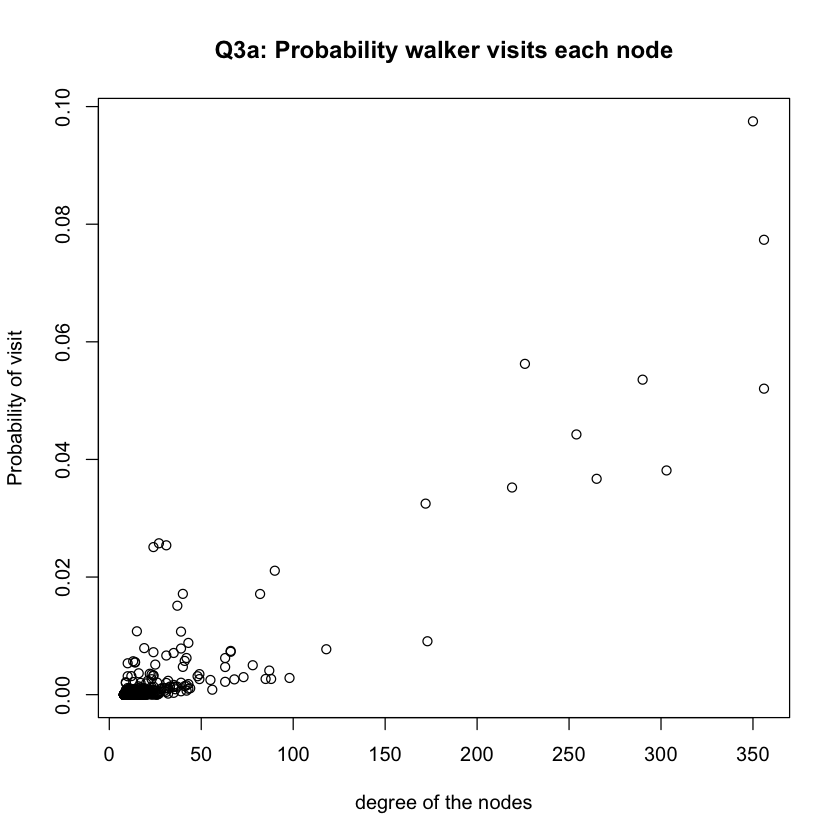

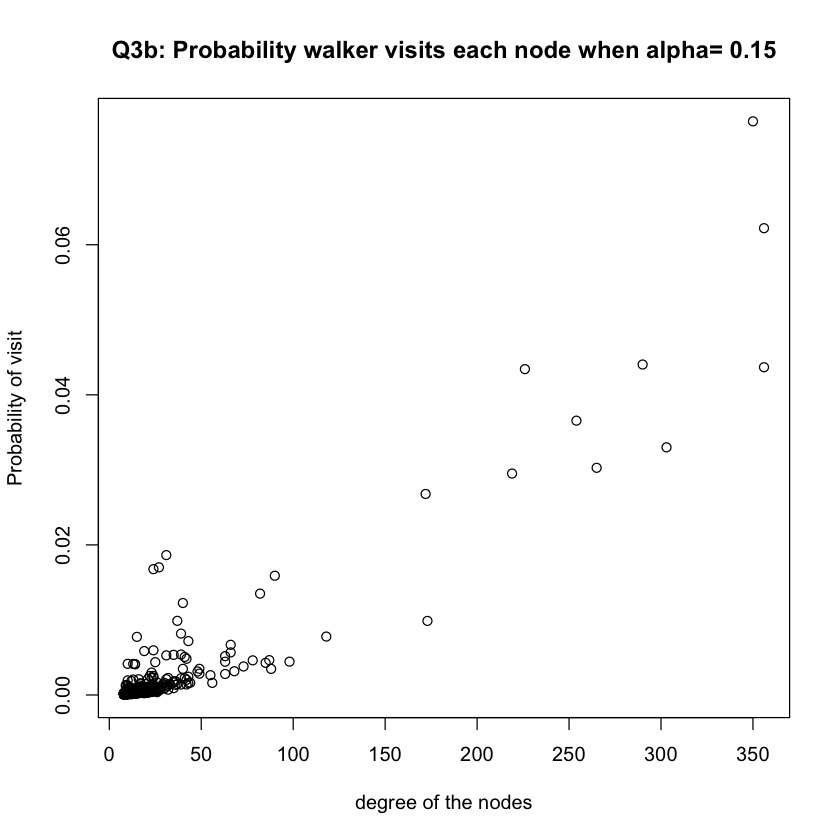

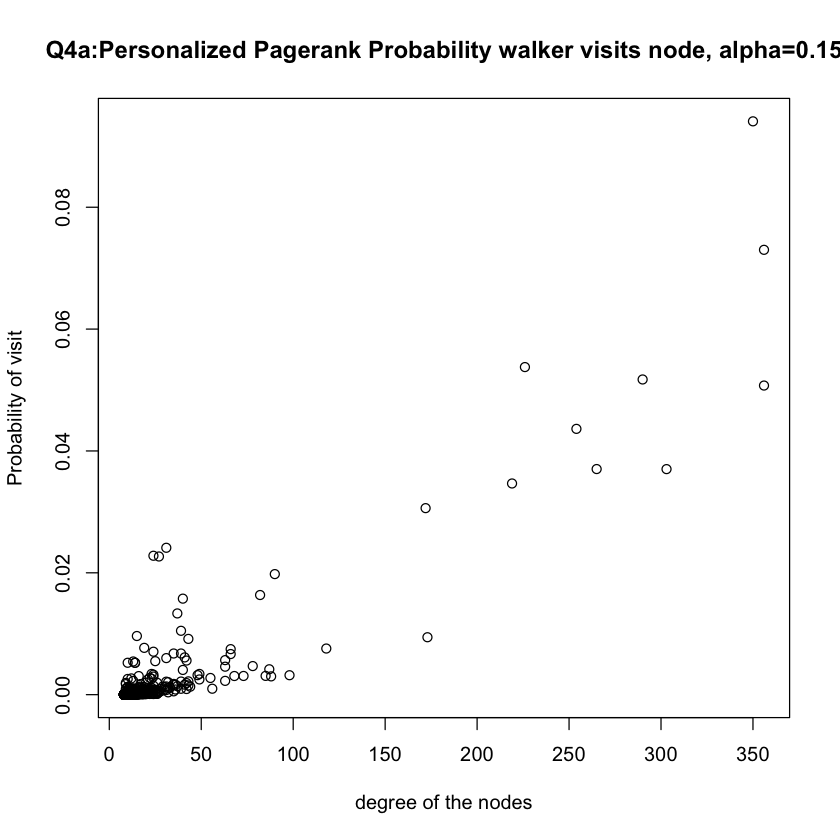

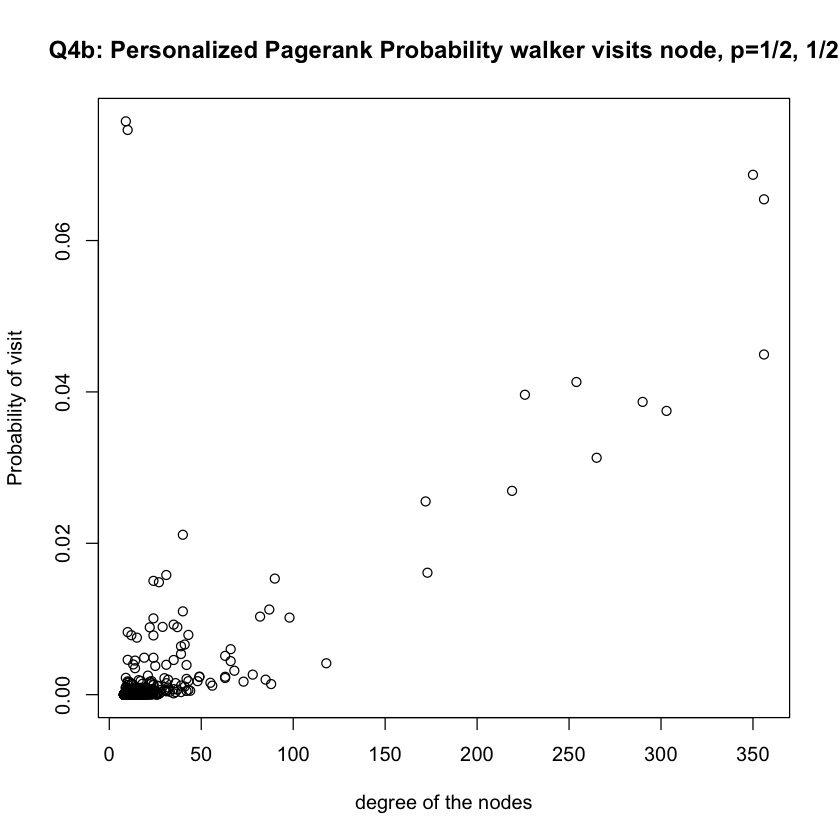

In [0]:
#Question 3(a), 3(b), 4(a), 4(b), 4(c)
STEPS_ = 1000
ITER_ = 100

prob_3a = eval(combo, STEPS_, ITER_, 0, "stimulate_pagerank") #Question3a
prob_3b = eval(combo, STEPS_, ITER_, 0.15, "stimulate_pagerank") #Question3b
prob_4a = eval(combo, STEPS_, ITER_, 0.15, "pagerank") #Question4a
prob_4b = eval(combo, STEPS_, ITER_, 0.15, "median_pagerank") #Question4b

plot(node_degrees,prob_3a,  main="Q3a: Probability walker visits each node", 
     xlab="degree of the nodes", ylab="Probability of visit") #Question3a
plot(node_degrees,prob_3b, main="Q3b: Probability walker visits each node when alpha= 0.15", 
     xlab="degree of the nodes", ylab="Probability of visit") #Question3b
plot(node_degrees,prob_4a, main="Q4a:Personalized Pagerank Probability walker visits node, alpha=0.15", 
     xlab="degree of the nodes", ylab="Probability of visit") #Question4a
plot(node_degrees,prob_4b, main="Q4b: Personalized Pagerank Probability walker visits node, p=1/2, 1/2", 
     xlab="degree of the nodes", ylab="Probability of visit") #Question4b

In [0]:
#calculating Pearson correlation coeff:
print(cor(node_degrees,prob_3a)) #Question3a
print(cor(node_degrees,prob_3b)) #Questionb
print(cor(node_degrees,prob_4a)) #Question4a
print(cor(node_degrees,prob_4b)) #Question4b

#fitting linear regression model:
lr_3a = lm(prob_3a ~ node_degrees) #Question3a
print(summary(lr_3a))
lr_3b = lm(prob_3b ~ node_degrees) #Question3b
print(summary(lr_3b))
lr_4a = lm(prob_4a ~ node_degrees) #Question4a
print(summary(lr_4a))
lr_4b = lm(prob_4b ~ node_degrees) #Question4b
print(summary(lr_4b))

[1] 0.9015493
[1] 0.9290006
[1] 0.9083898
[1] 0.7494791

Call:
lm(formula = prob_3a ~ node_degrees)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.020698 -0.000285  0.000256  0.000436  0.036606 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.880e-03  9.224e-05  -20.38   <2e-16 ***
node_degrees  1.805e-04  2.741e-06   65.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.002568 on 998 degrees of freedom
Multiple R-squared:  0.8128,	Adjusted R-squared:  0.8126 
F-statistic:  4333 on 1 and 998 DF,  p-value: < 2.2e-16


Call:
lm(formula = prob_3b ~ node_degrees)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0136377 -0.0001902  0.0001774  0.0003032  0.0240629 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.330e-03  6.195e-05  -21.47   <2e-16 ***
node_degrees  1.460e-04  1.841e-06   79.30   <2e-16 ***
---
Signi

In [0]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [0]:
random_walk = function (g, steps, start_node, transition_matrix = NULL, teleport = 0,
                       teleport_type="stimulate_pagerank",probability = NULL, medians=NULL)
{
  v_nodes = rep(0,steps)
  if(is.null(transition_matrix))
      transition_matrix = create_transition_matrix(g)
  
  v <- start_node
  for(index in 1:steps)
  {
    if (runif(1) < teleport) {
        if (teleport_type == "stimulate_pagerank") #for Question3, part(a),(b)
        {
            v = sample(1:vcount(g),1)
        }
        else if (teleport_type == "pagerank") #for Question4, part(a)
        {
            v = sample(1:vcount(g),1,prob = probability)
        }
        else if (teleport_type == "median_pagerank") #for Question4, part(b)
        {
            v = sample(medians,1)
        }
        else 
        {
            quit() #error
        }
    }
    else
    {
        PMF <- transition_matrix[v, ]
        v <- sample(1:vcount(g), 1, prob = PMF)
    }
    v_nodes[index] = v
  }
  return(v_nodes)
}

In [0]:
eval = function(g, step, iter, alpha, type)
{
    steps_steadystate = ceiling(log(vcount(g))) #min steps that need to be passed
    v_counts_ = rep(0,vcount(g)) #initialize v_counts that stores counts after stead state 
    list_ = seq(from=1,to=vcount(g)) #store index of each node
    tm = create_transition_matrix(g) #transition matrix is called
    
    # For Question4, part(a): Pagerank is used
    pagerank = page_rank(g)
    pagerank = pagerank$vector
    pagerank_sort = order(pagerank)
    med = c(pagerank_sort[floor(vcount(g)/2)], pagerank_sort[floor(vcount(g)/2)+1])
    
    for (i in 1:iter)
    {
        v_Nodes = random_walk(g, start=sample(index_list,1), steps=step, transition_matrix=tm, teleport=alpha,
                              teleport_type=type, probability=pagerank, medians=med)
        for (j in 1:length(v_Nodes))
        {
            if (j > steps_steadystate)
                v_counts_[v_Nodes[j]] = v_counts_[v_Nodes[j]] + 1
        }
    }
    prob_node = v_counts_ / ((step - steps_steadystate) *iter)
    return(prob_node)
}

In [0]:
## Question3, part(a)
nodes = 1000
M = 4

g1 = barabasi.game(n=nodes,m=M, directed=TRUE) #create directed random network with 1000 nodes, using preferential

g2_ = barabasi.game(n=nodes,m=M, directed=TRUE) #create another random network using preferential and shuffle the node indices
g2 = permute(g2_, sample(vcount(g2_)))
g2_edges = t(as_edgelist(g2))
combo = add_edges(g1,g2_edges) #Combine the edges of g1 and g2

node_degrees = degree(combo)
pagerank_tm = create_transition_matrix(combo)
#print(pagerank_tm)

In [0]:
#Question 3(a), 3(b), 4(a), 4(b), 4(c)
STEPS_ = 1000
ITER_ = 100

prob_3a = eval(combo, STEPS_, ITER_, 0, "stimulate_pagerank") #Question3a
prob_3b = eval(combo, STEPS_, ITER_, 0.15, "stimulate_pagerank") #Question3b
prob_4a = eval(combo, STEPS_, ITER_, 0.15, "pagerank") #Question4a
prob_4b = eval(combo, STEPS_, ITER_, 0.15, "median_pagerank") #Question4b

plot(node_degrees,prob_3a,  main="Q3a: Probability walker visits each node", 
     xlab="degree of the nodes", ylab="Probability of visit") #Question3a
plot(node_degrees,prob_3b, main="Q3b: Probability walker visits each node when alpha= 0.15", 
     xlab="degree of the nodes", ylab="Probability of visit") #Question3b
plot(node_degrees,prob_4a, main="Q4a:Personalized Pagerank Probability walker visits node, alpha=0.15", 
     xlab="degree of the nodes", ylab="Probability of visit") #Question4a
plot(node_degrees,prob_4b, main="Q4b: Personalized Pagerank Probability walker visits node, p=1/2, 1/2", 
     xlab="degree of the nodes", ylab="Probability of visit") #Question4b

In [0]:
#calculating Pearson correlation coeff:
print(cor(node_degrees,prob_3a)) #Question3a
print(cor(node_degrees,prob_3b)) #Questionb
print(cor(node_degrees,prob_4a)) #Question4a
print(cor(node_degrees,prob_4b)) #Question4b

#fitting linear regression model:
lr_3a = lm(prob_3a ~ node_degrees) #Question3a
print(summary(lr_3a))
lr_3b = lm(prob_3b ~ node_degrees) #Question3b
print(summary(lr_3b))
lr_4a = lm(prob_4a ~ node_degrees) #Question4a
print(summary(lr_4a))
lr_4b = lm(prob_4b ~ node_degrees) #Question4b
print(summary(lr_4b))

In [0]:
[1] 0.9015493
[1] 0.9290006
[1] 0.9083898
[1] 0.7494791

Call:
lm(formula = prob_3a ~ node_degrees)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.020698 -0.000285  0.000256  0.000436  0.036606 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.880e-03  9.224e-05  -20.38   <2e-16 ***
node_degrees  1.805e-04  2.741e-06   65.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.002568 on 998 degrees of freedom
Multiple R-squared:  0.8128,	Adjusted R-squared:  0.8126 
F-statistic:  4333 on 1 and 998 DF,  p-value: < 2.2e-16


Call:
lm(formula = prob_3b ~ node_degrees)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0136377 -0.0001902  0.0001774  0.0003032  0.0240629 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.330e-03  6.195e-05  -21.47   <2e-16 ***
node_degrees  1.460e-04  1.841e-06   79.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001725 on 998 degrees of freedom
Multiple R-squared:  0.863,	Adjusted R-squared:  0.8629 
F-statistic:  6289 on 1 and 998 DF,  p-value: < 2.2e-16


Call:
lm(formula = prob_4a ~ node_degrees)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.019309 -0.000247  0.000234  0.000409  0.033392 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.784e-03  8.552e-05  -20.86   <2e-16 ***
node_degrees  1.744e-04  2.541e-06   68.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.002381 on 998 degrees of freedom
Multiple R-squared:  0.8252,	Adjusted R-squared:  0.825 
F-statistic:  4710 on 1 and 998 DF,  p-value: < 2.2e-16


Call:
lm(formula = prob_4b ~ node_degrees)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.011371 -0.000419  0.000005  0.000149  0.074396 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.304e-03  1.358e-04  -9.601   <2e-16 ***
node_degrees  1.444e-04  4.037e-06  35.764   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003781 on 998 degrees of freedom
Multiple R-squared:  0.5617,	Adjusted R-squared:  0.5613 
F-statistic:  1279 on 1 and 998 DF,  p-value: < 2.2e-16
